# scCompare Tutorial

### Data Location

You can find the data [here](https://d27578rxq7mzq7.cloudfront.net/). Download both
files locally to a common directory.

### Package imports and reading in data
In this tutorial, `map_adata` will be the mapping dataset (the cells with cell type
already defined) and `test_adata` will be the test dataset (the cells we want to
categorize).

In [1]:
from os import path

import scanpy as sc

import scCompare as scc

DATA_DIR = path.join(
    "/", "mnt", "c", "Users", "tgelafromer", "Downloads"
)  # Customize this to point to your data location
OUT_DIR = path.join(
    "/", "home", "tgelafromer", "sc_compare_output"
)  # Customize this to point to your desired output folder

map_adata = sc.read_h5ad(path.join(DATA_DIR, "mapping.h5ad"))  # Our mapping dataset
test_adata = sc.read_h5ad(path.join(DATA_DIR, "test.h5ad"))  # Our test dataset


Let's peak at our `map_adata` `obs`

In [2]:
map_adata.obs


day protocol cell_line  passage scientist  \
Unnamed: 0                                                            
E1_TGAAGAGAAGAGTCAA_32_8  D24       SM    AICS11       44        KG   
E1_ATCATTCCAACAACCA_0_7   D12       SM     AICS0       31        AN   
E1_CCTAATCCCATACCAA_0_1   D12       SM     AICS0       31        AN   
E1_AAGACGGAAAGGACAC_20_6  D12       SM     AICS0       28        KG   
E1_ACACGACCAAGGTACA_6_8   D12       SM    AICS11       42        KG   
...                       ...      ...       ...      ...       ...   
E2_CGGATTGCATAGCGAC_46_2  D24       SM    AICS37       37        KG   
E2_CGGATTGCTGGAACAA_46_2  D24       SM    AICS37       37        KG   
E2_GAGTTAGCAACCGAGA_45_1  D24       SM    AICS37       37        KG   
E2_AAGACGGAAAGGTACA_46_2  D24       SM    AICS37       37        KG   
E2_AGCAGGAAAACCGAGA_45_3  D24       SM    AICS37       37        KG   

                           diff_exp ctnt seq_exp  sample_num  n_genes  ...  \
Unnamed: 0                                                             ...   
E1_TGAAGAGAAGAGTCAA_32_8  7_24_2017   92    Exp1          33     4941  ...   
E1_ATCATTCCAACAACCA_0_7   7_10_2017   73    Exp1           1     5270  ...   
E1_CCTAATCCCATACCAA_0_1   7_10_2017   73    Exp1           1     4930  ...   
E1_AAGACGGAAAGGACAC_20_6  7_27_2017   77    Exp1          21     4389  ...   
E1_ACACGACCAAGGTACA_6_8   7_13_2017   86    Exp1           7     5471  ...   
...                             ...  ...     ...         ...      ...  ...   
E2_CGGATTGCATAGCGAC_46_2  7_27_2017   84    Exp2          45     1373  ...   
E2_CGGATTGCTGGAACAA_46_2  7_27_2017   84    Exp2          45     1389  ...   
E2_GAGTTAGCAACCGAGA_45_1  7_27_2017   84    Exp2          45     1285  ...   
E2_AAGACGGAAAGGTACA_46_2  7_27_2017   84    Exp2          45     1444  ...   
E2_AGCAGGAAAACCGAGA_45_3  7_27_2017   84    Exp2          45     1474  ...   

                          n_genes_by_counts  total_counts  doublet_score  \
Unnamed: 0                                                                 
E1_TGAAGAGAAGAGTCAA_32_8               4941       15811.0       0.057037   
E1_ATCATTCCAACAACCA_0_7                5270       15809.0       0.088776   
E1_CCTAATCCCATACCAA_0_1                4930       15800.0       0.051646   
E1_AAGACGGAAAGGACAC_20_6               4389       15795.0       0.051646   
E1_ACACGACCAAGGTACA_6_8                5471       15785.0       0.036891   
...                                     ...           ...            ...   
E2_CGGATTGCATAGCGAC_46_2               1373        2320.0       0.027758   
E2_CGGATTGCTGGAACAA_46_2               1389        2320.0       0.019106   
E2_GAGTTAGCAACCGAGA_45_1               1285        2318.0       0.016181   
E2_AAGACGGAAAGGTACA_46_2               1444        2308.0       0.098234   
E2_AGCAGGAAAACCGAGA_45_3               1474        2308.0       0.098234   

                          predicted_doublet   S_score  G2M_score  phase  \
Unnamed: 0                                                                
E1_TGAAGAGAAGAGTCAA_32_8              False -0.483422  -0.577555     G1   
E1_ATCATTCCAACAACCA_0_7               False  0.715843   0.516099      S   
E1_CCTAATCCCATACCAA_0_1               False -0.902425  -0.206763     G1   
E1_AAGACGGAAAGGACAC_20_6              False -0.632844  -0.474345     G1   
E1_ACACGACCAAGGTACA_6_8               False -0.622719  -0.747758     G1   
...                                     ...       ...        ...    ...   
E2_CGGATTGCATAGCGAC_46_2              False -0.144860  -0.077236     G1   
E2_CGGATTGCTGGAACAA_46_2              False -0.050512  -0.068072     G1   
E2_GAGTTAGCAACCGAGA_45_1              False -0.102804  -0.019946     G1   
E2_AAGACGGAAAGGTACA_46_2              False -0.104250  -0.092820     G1   
E2_AGCAGGAAAACCGAGA_45_3              False -0.064530   0.017104    G2M   

                         control_vs_experimental leiden cell_type  
Unnamed: 0                                            

You can choose to group your cells using any column in the `obs` structure. For our
purposes, we have already annotated the mapping set's cells with a `cell_type` column,
which we will use for grouping.

### Run scCompare

Running QC on adata objects...Done!
adata objects pass QC!


/home/tgelafromer/repos/bfx-scCompare/scCompare.py:45: UserWarning: cell_type not found in `uns`. Metadata about the clustering in cell_type
        can not be saved.
  warn(warning_text)


Generating bulk signatures...Done!
Assigning clusters to mapping cells...Done!
Deriving statistical cutoff...Knee Locator Result for Number of MADs Selection: 3.0612244897959187...
Knee Locator Result under MAD floor, using 5 MADs instead...


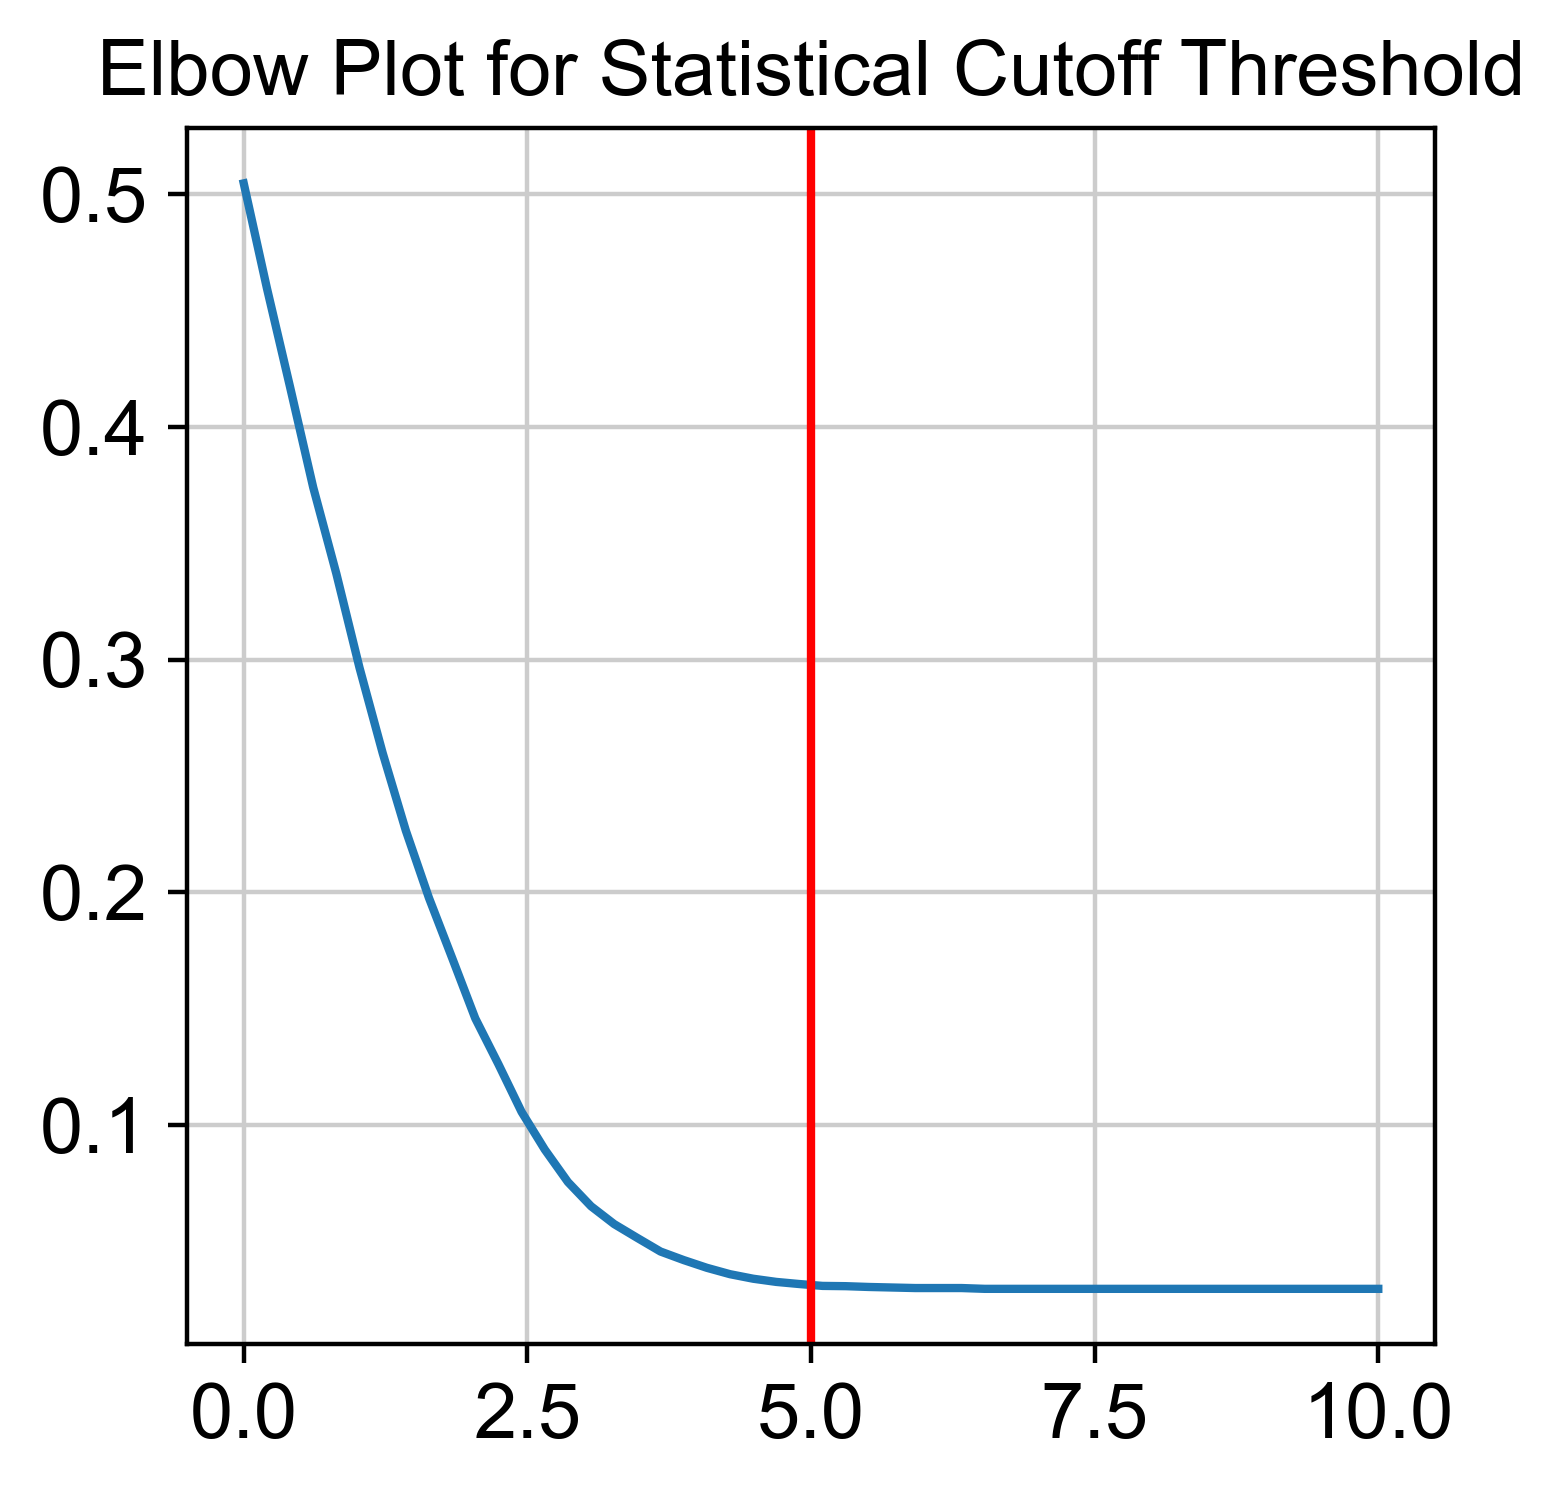

Done!
Assigning class to mapping cells...Done!
Calculating mapping metrics...Done!


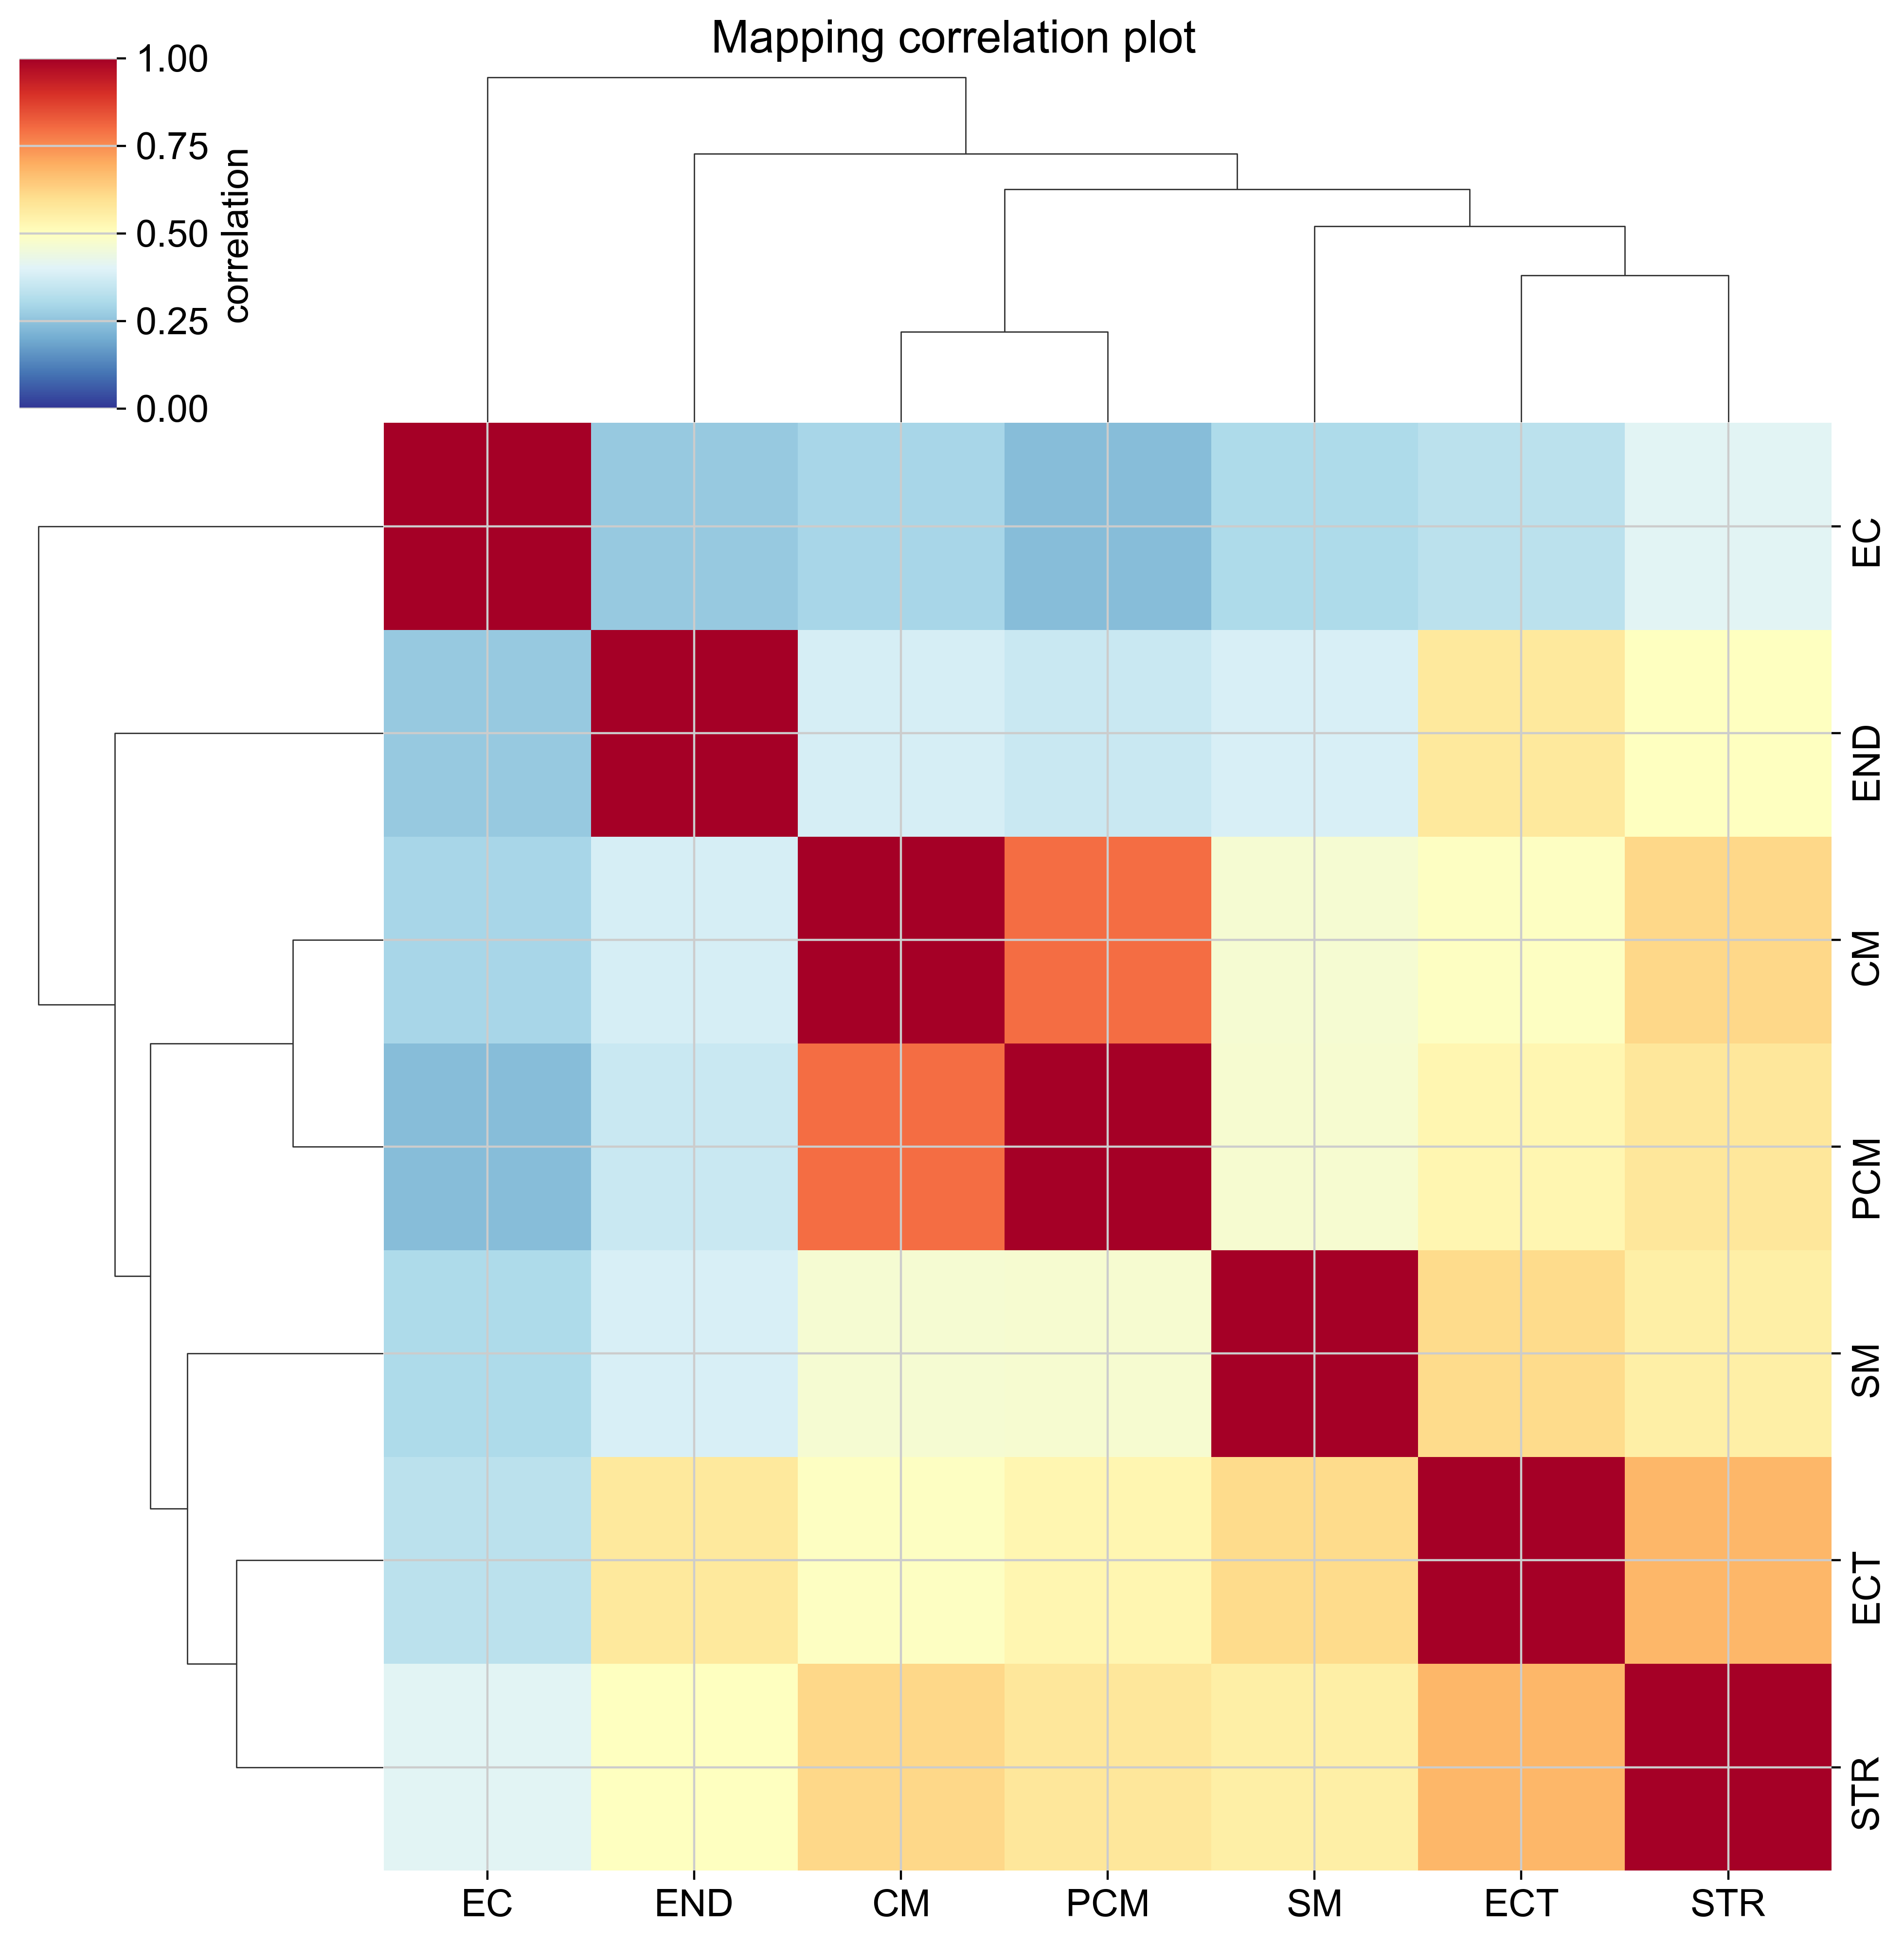

Calculating cluster frequencies...Done!
fraction mapped cells = 0.9827608061858284
r2 score = 0.9328238598234009
Generating plots


/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


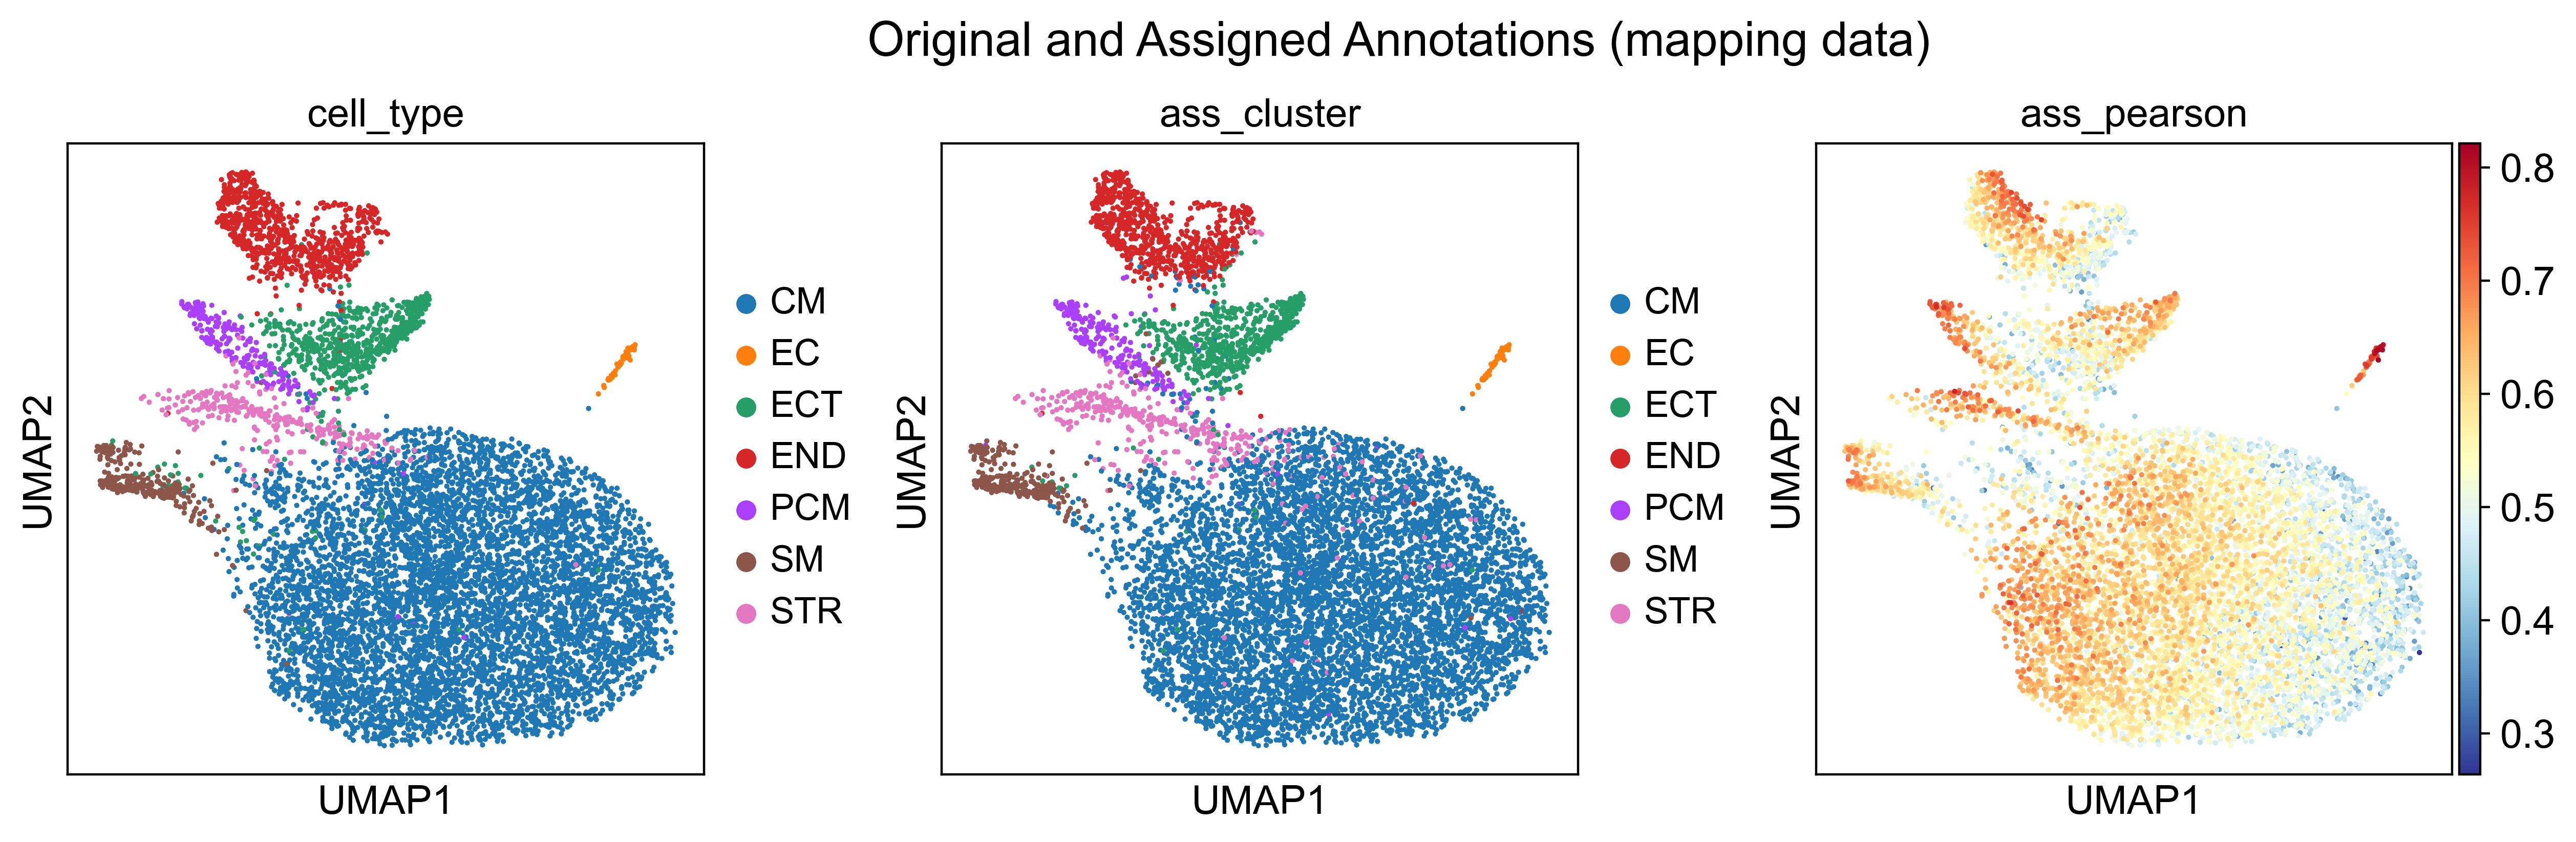

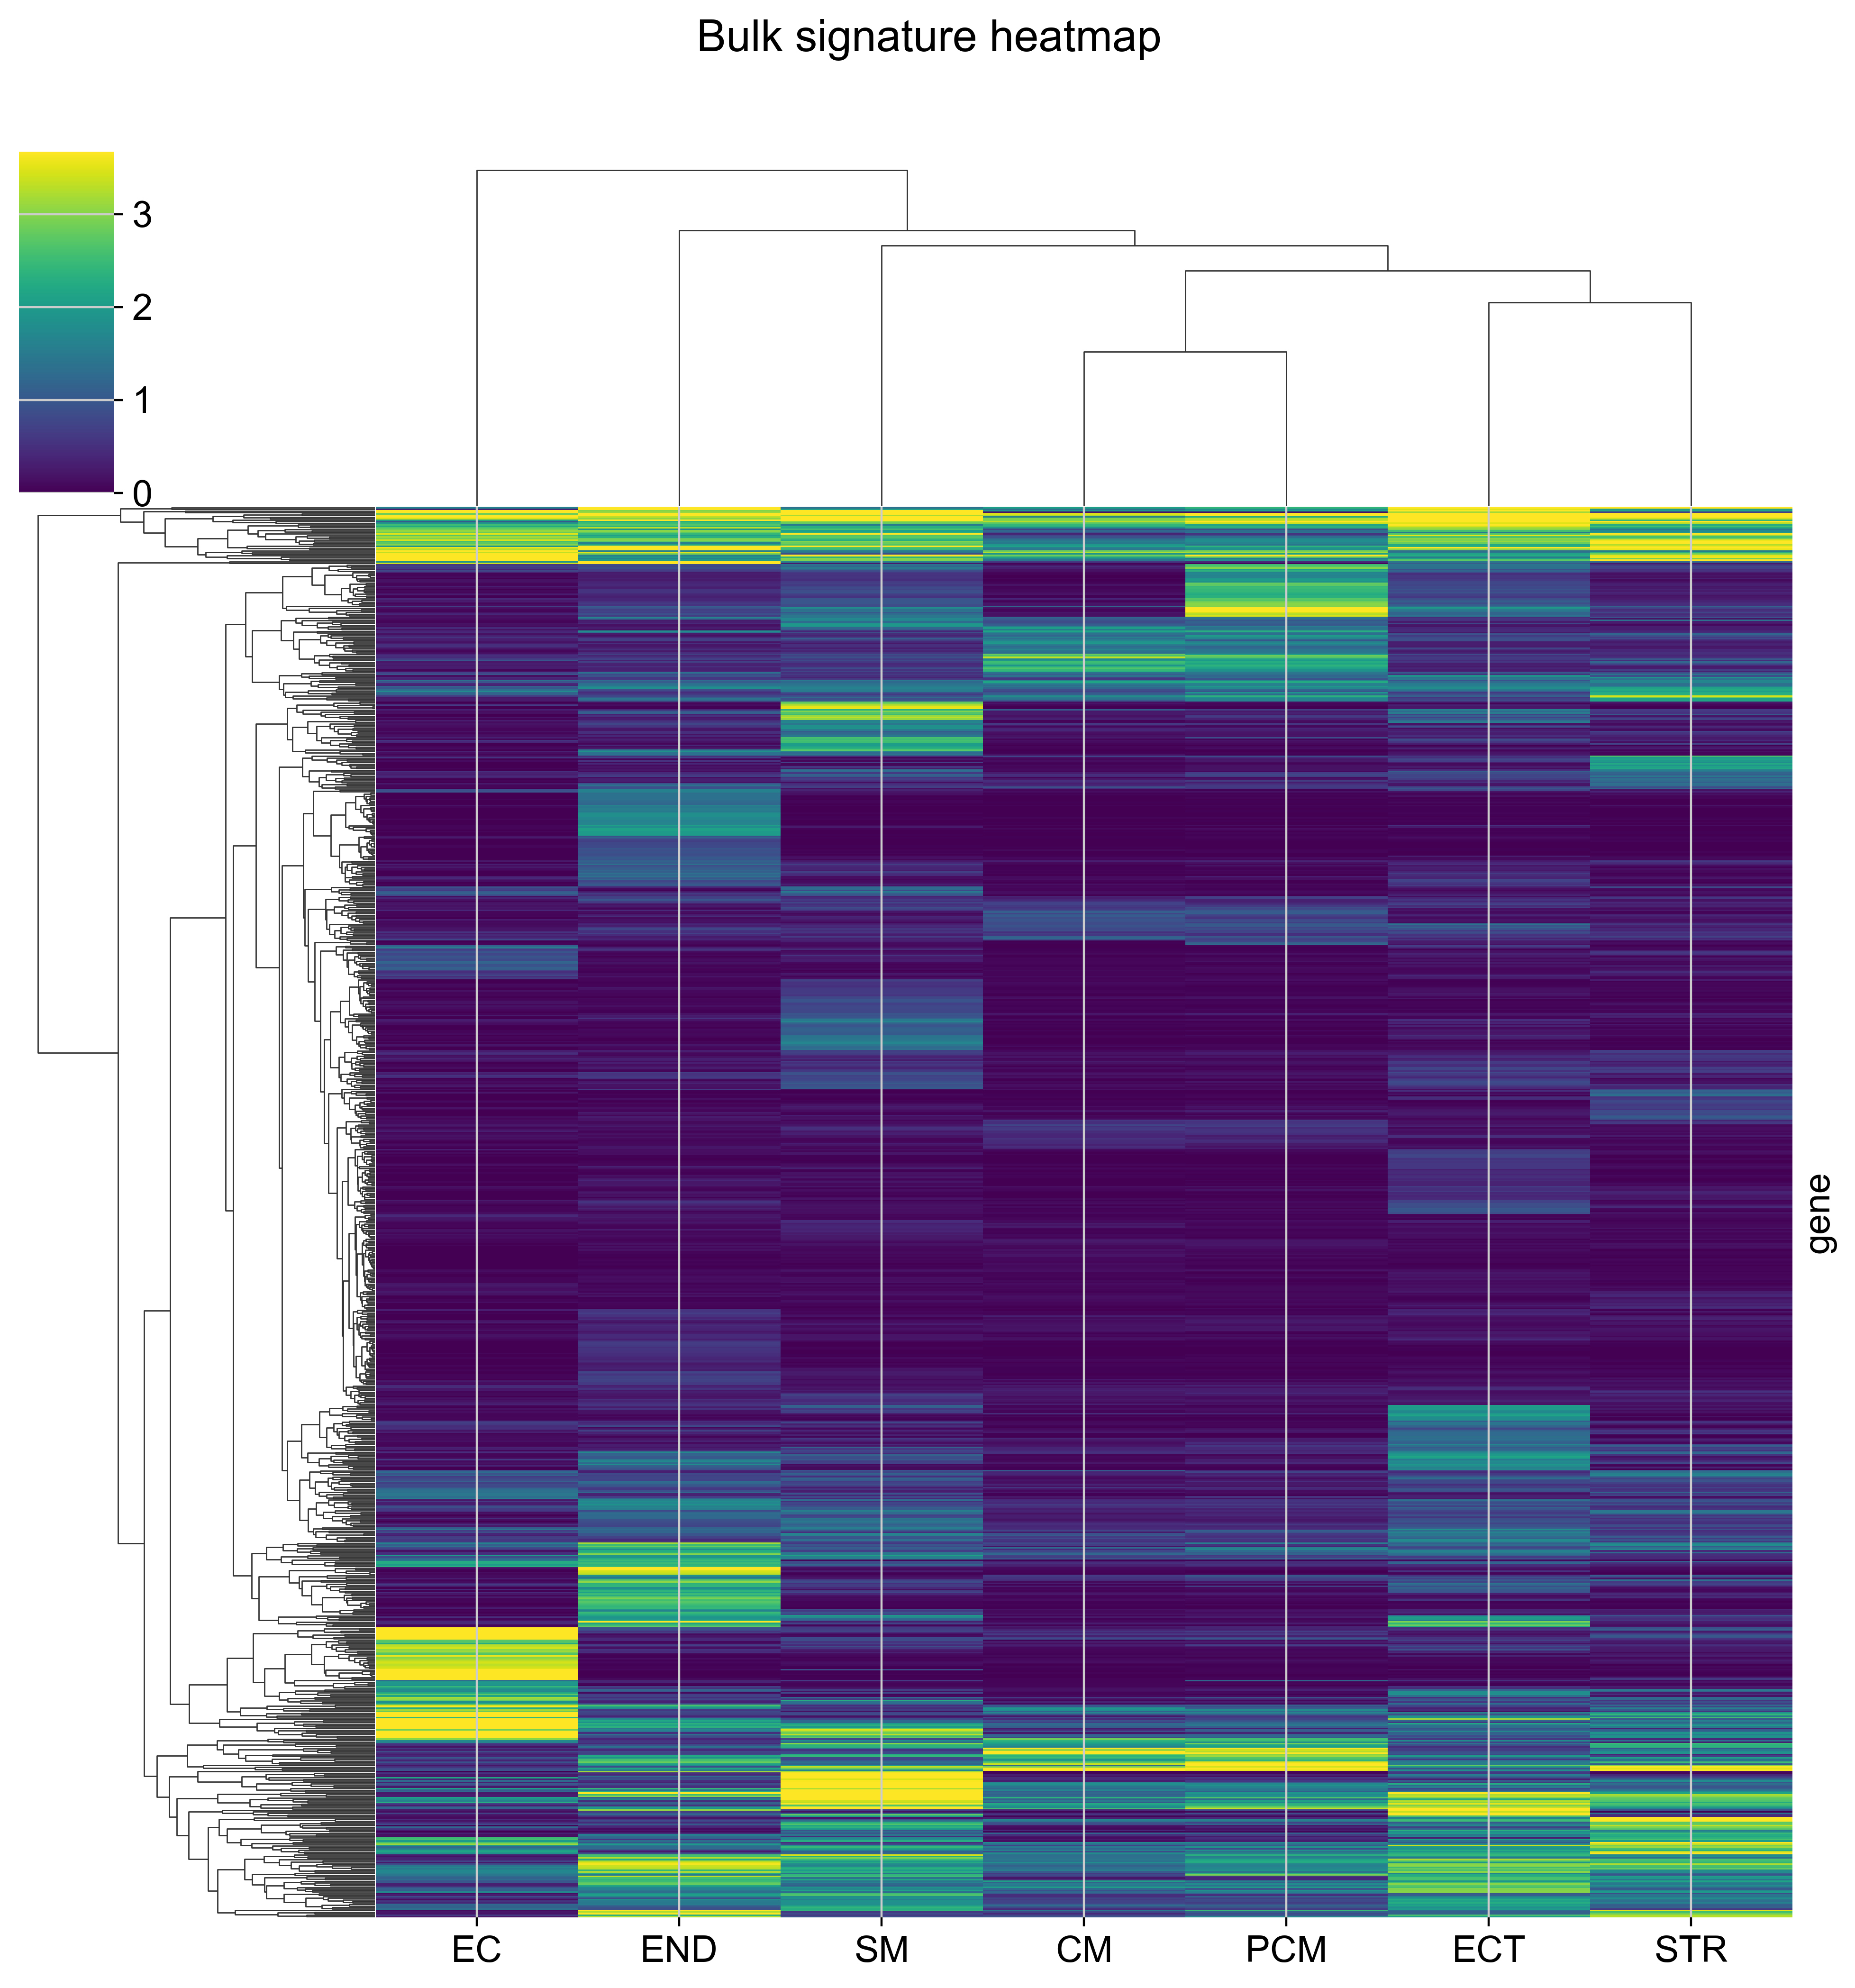

/home/tgelafromer/repos/bfx-scCompare/plots.py:220: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.get_figure().show()
/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


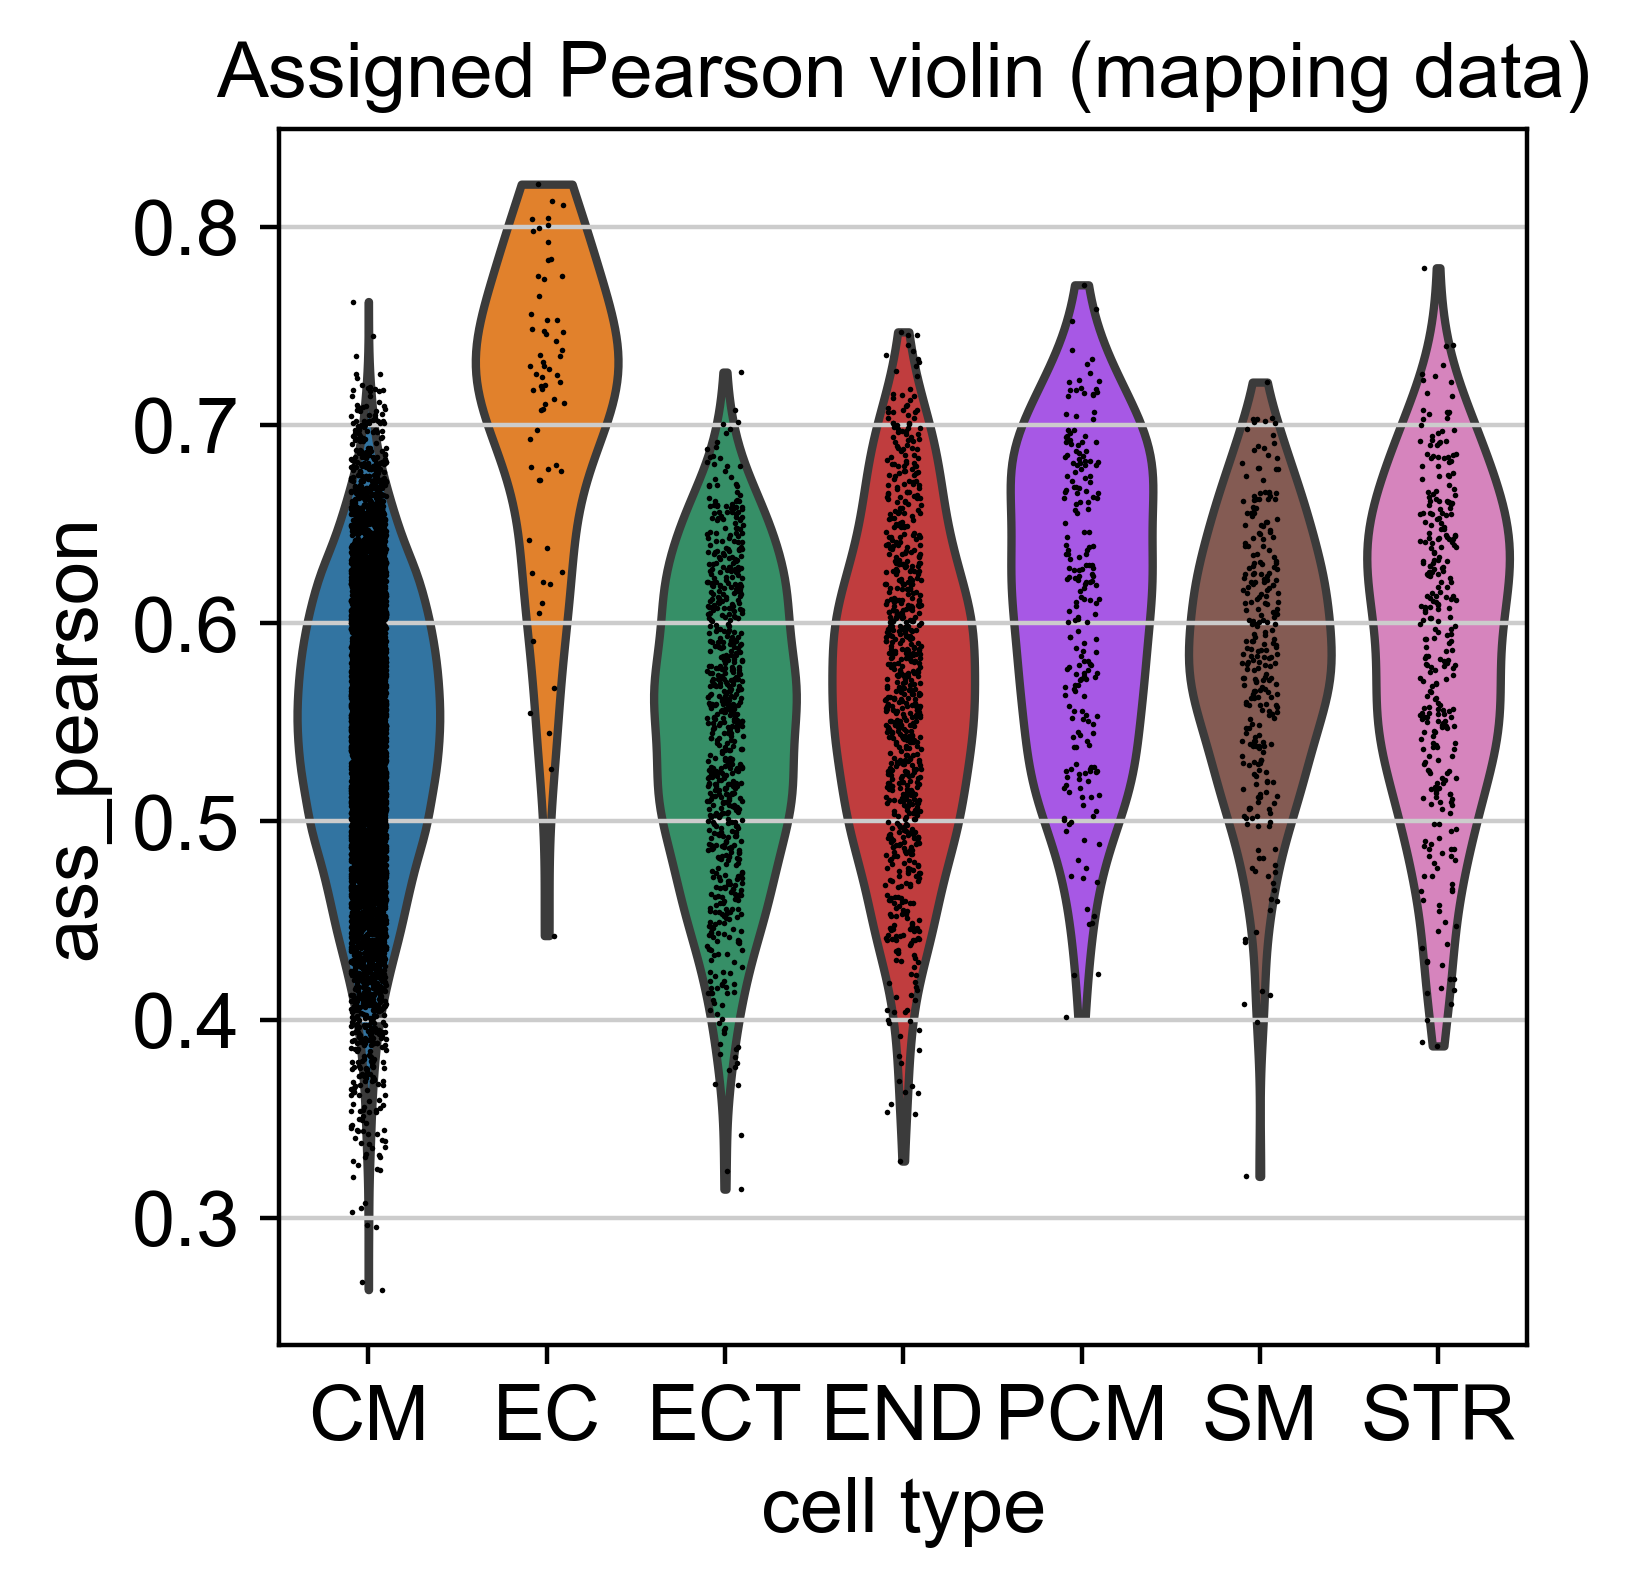

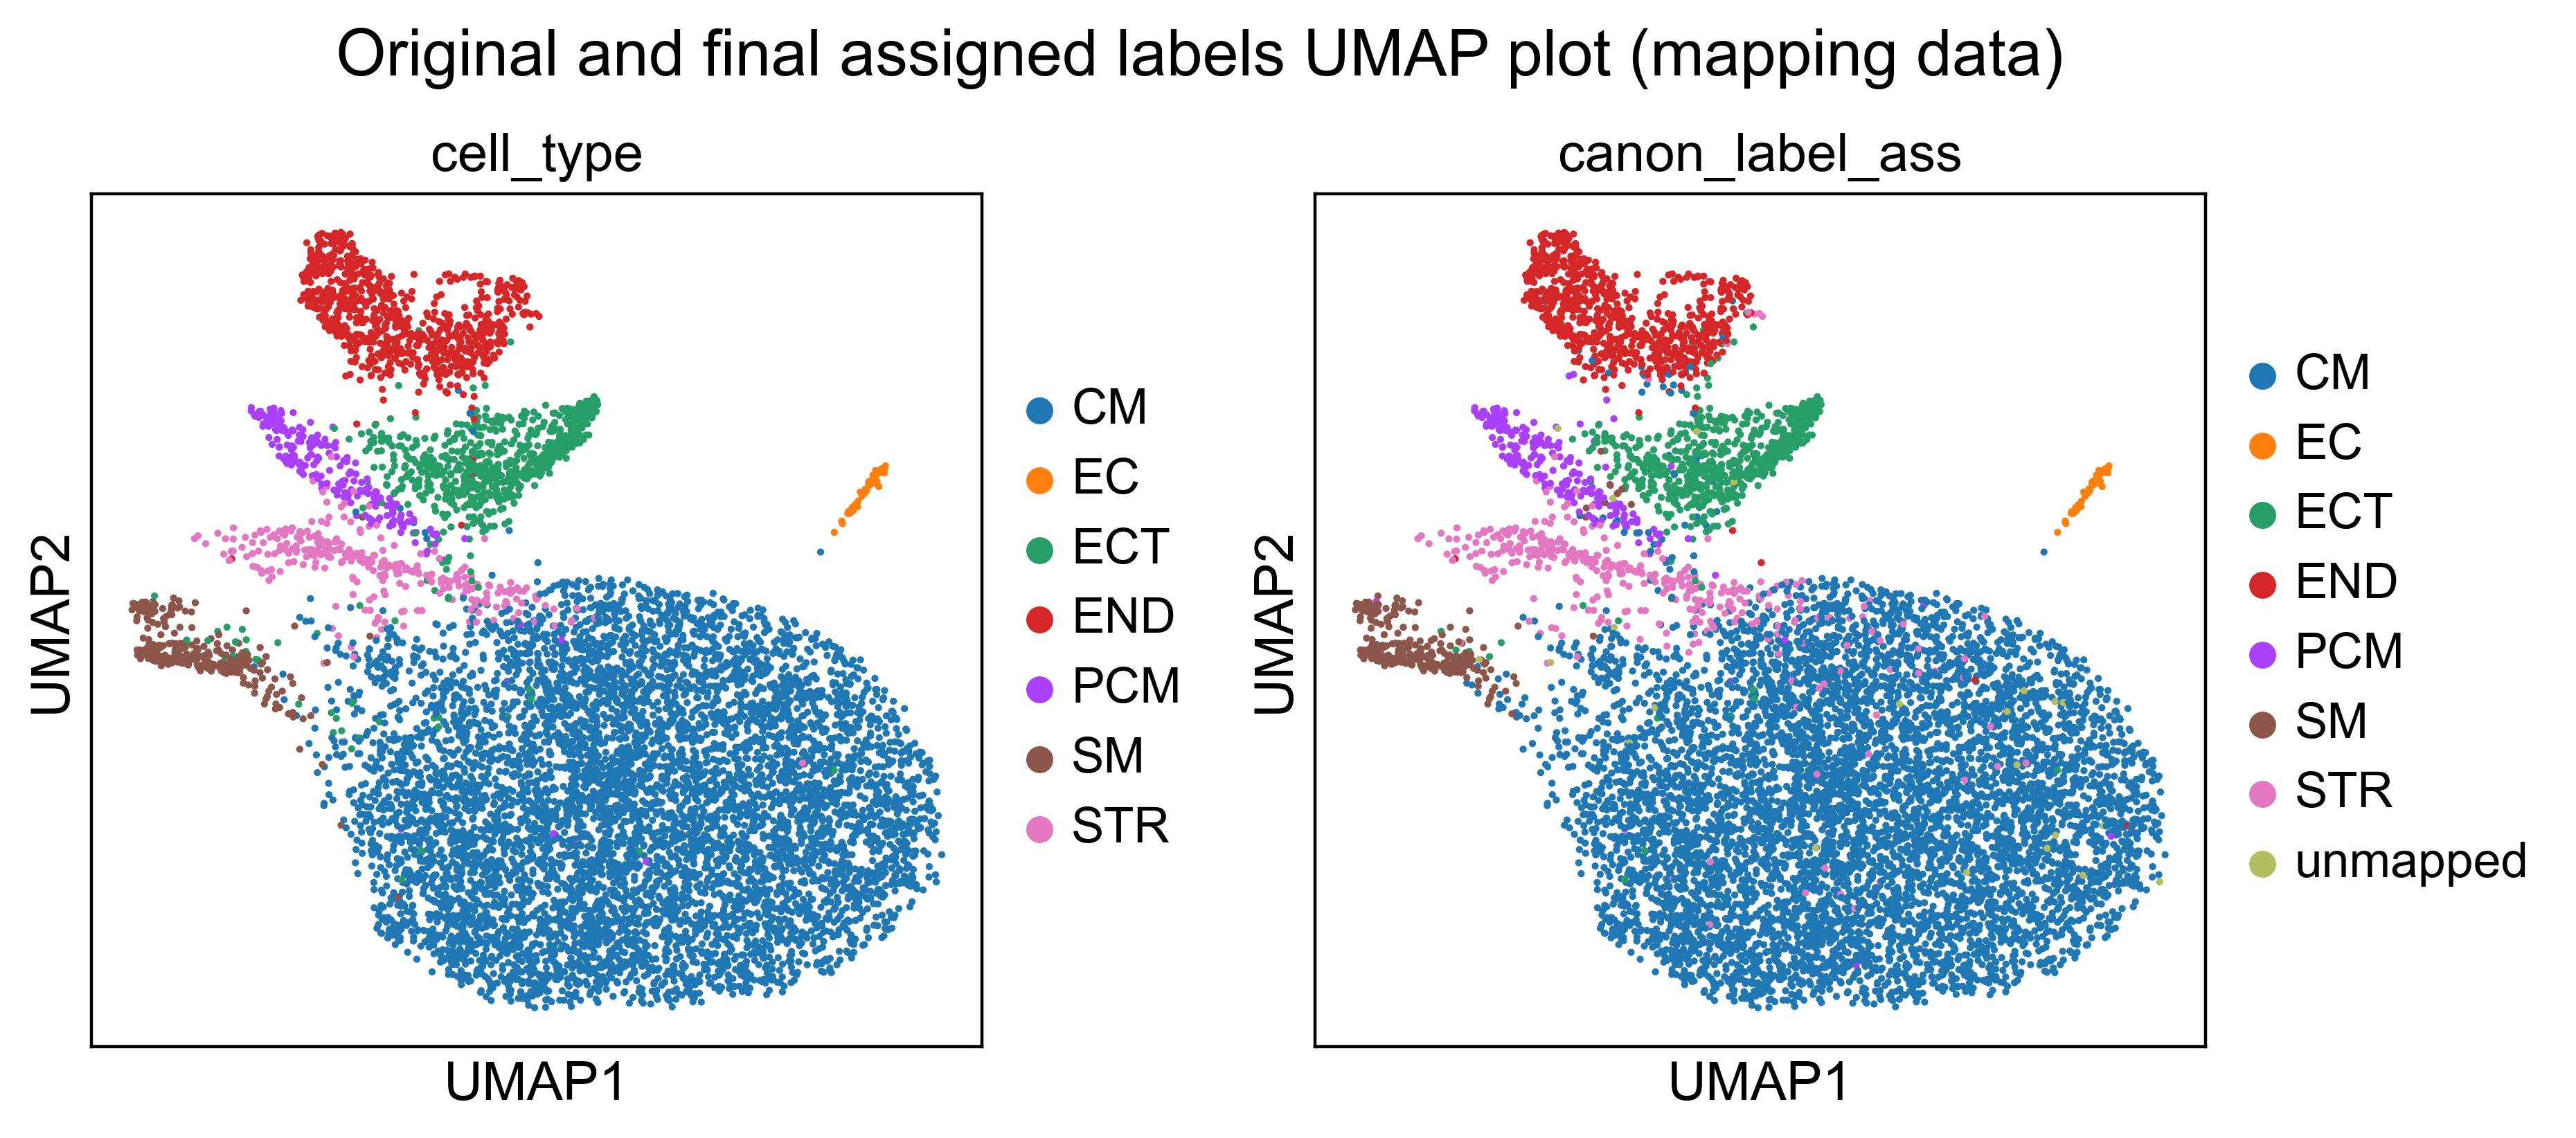

/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


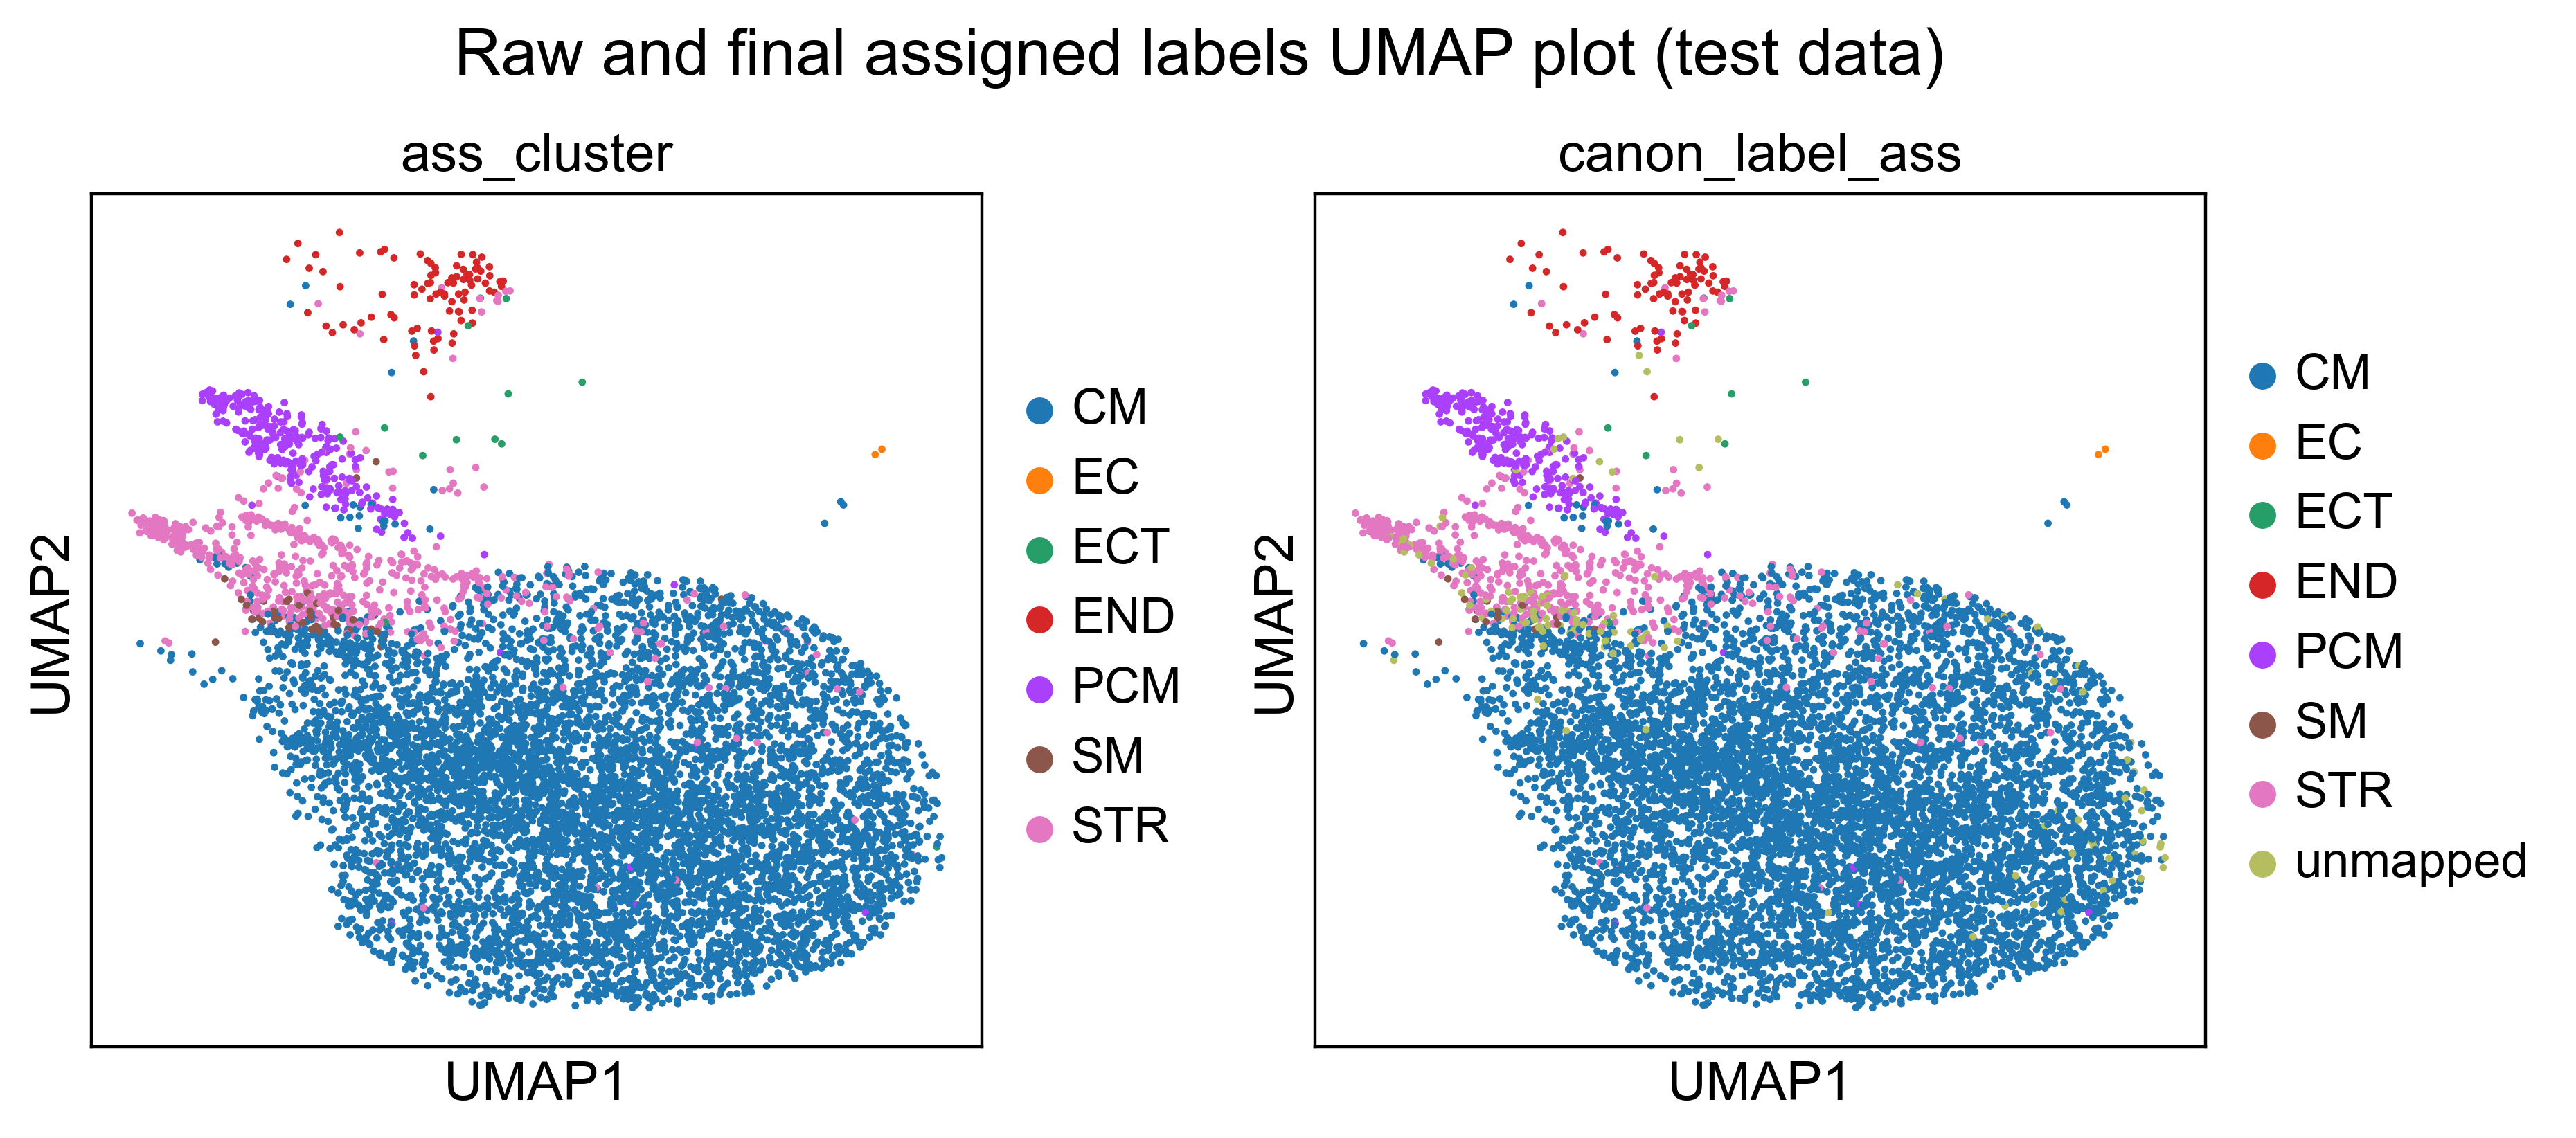

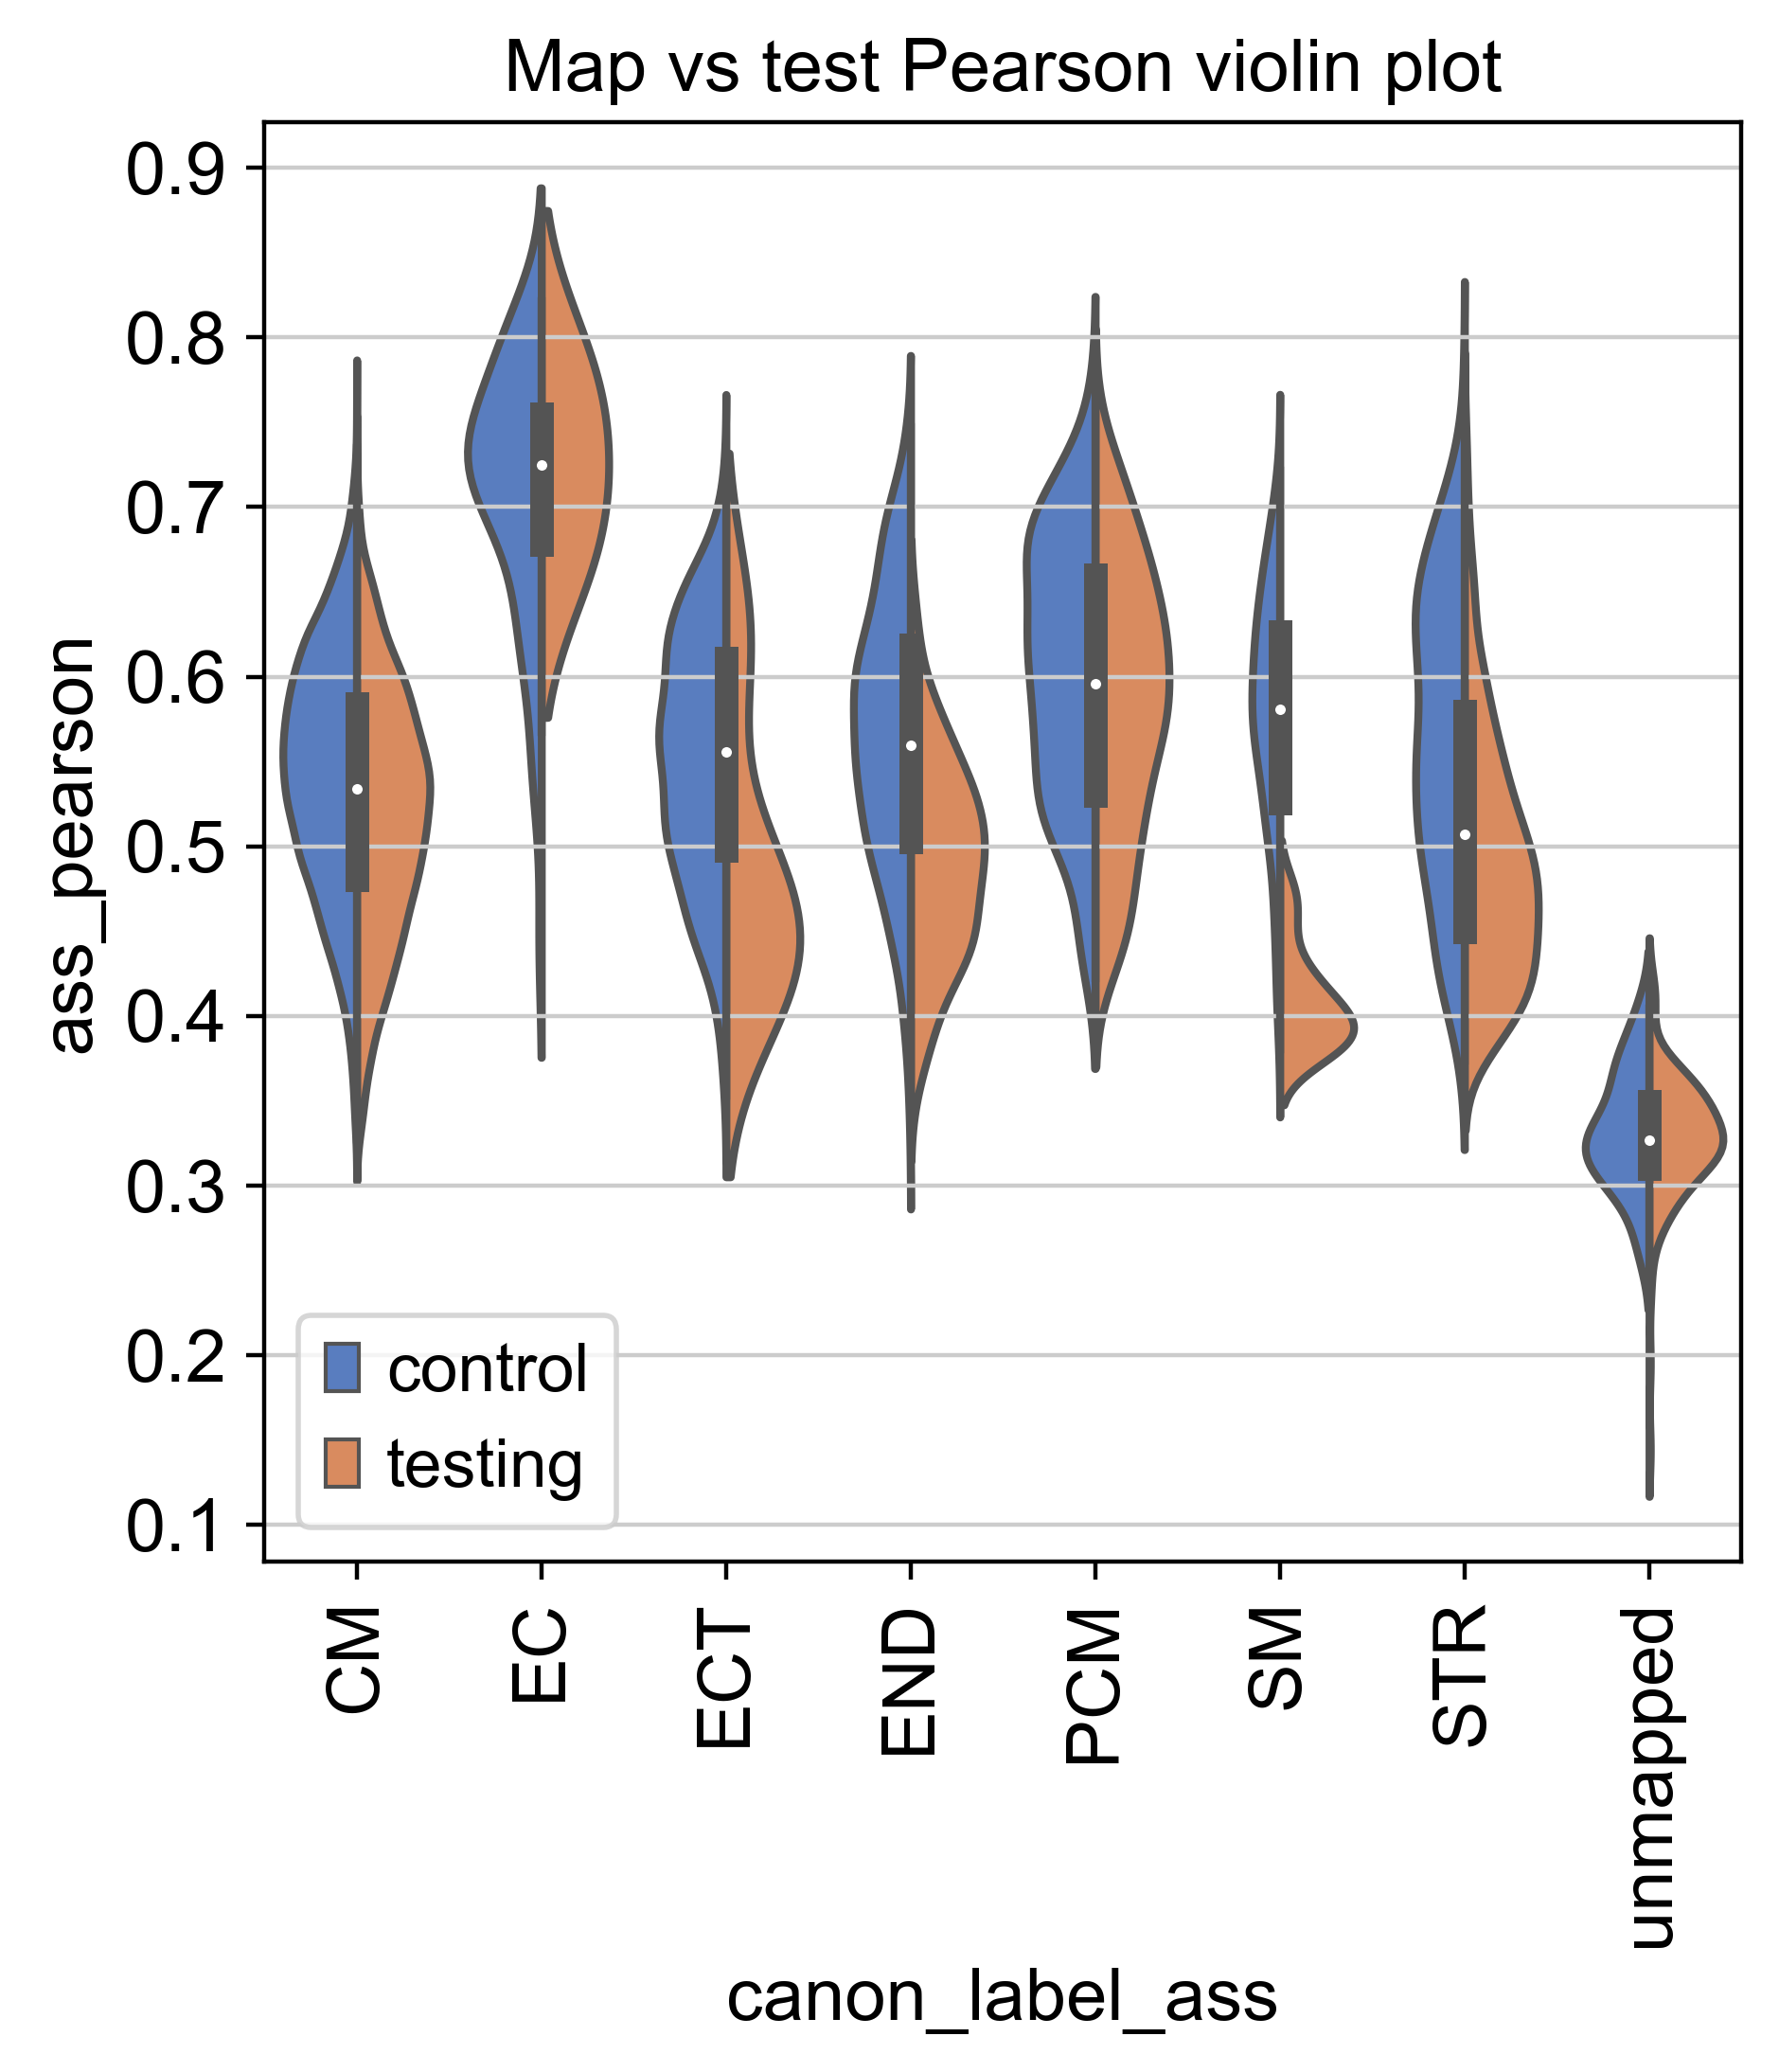

/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


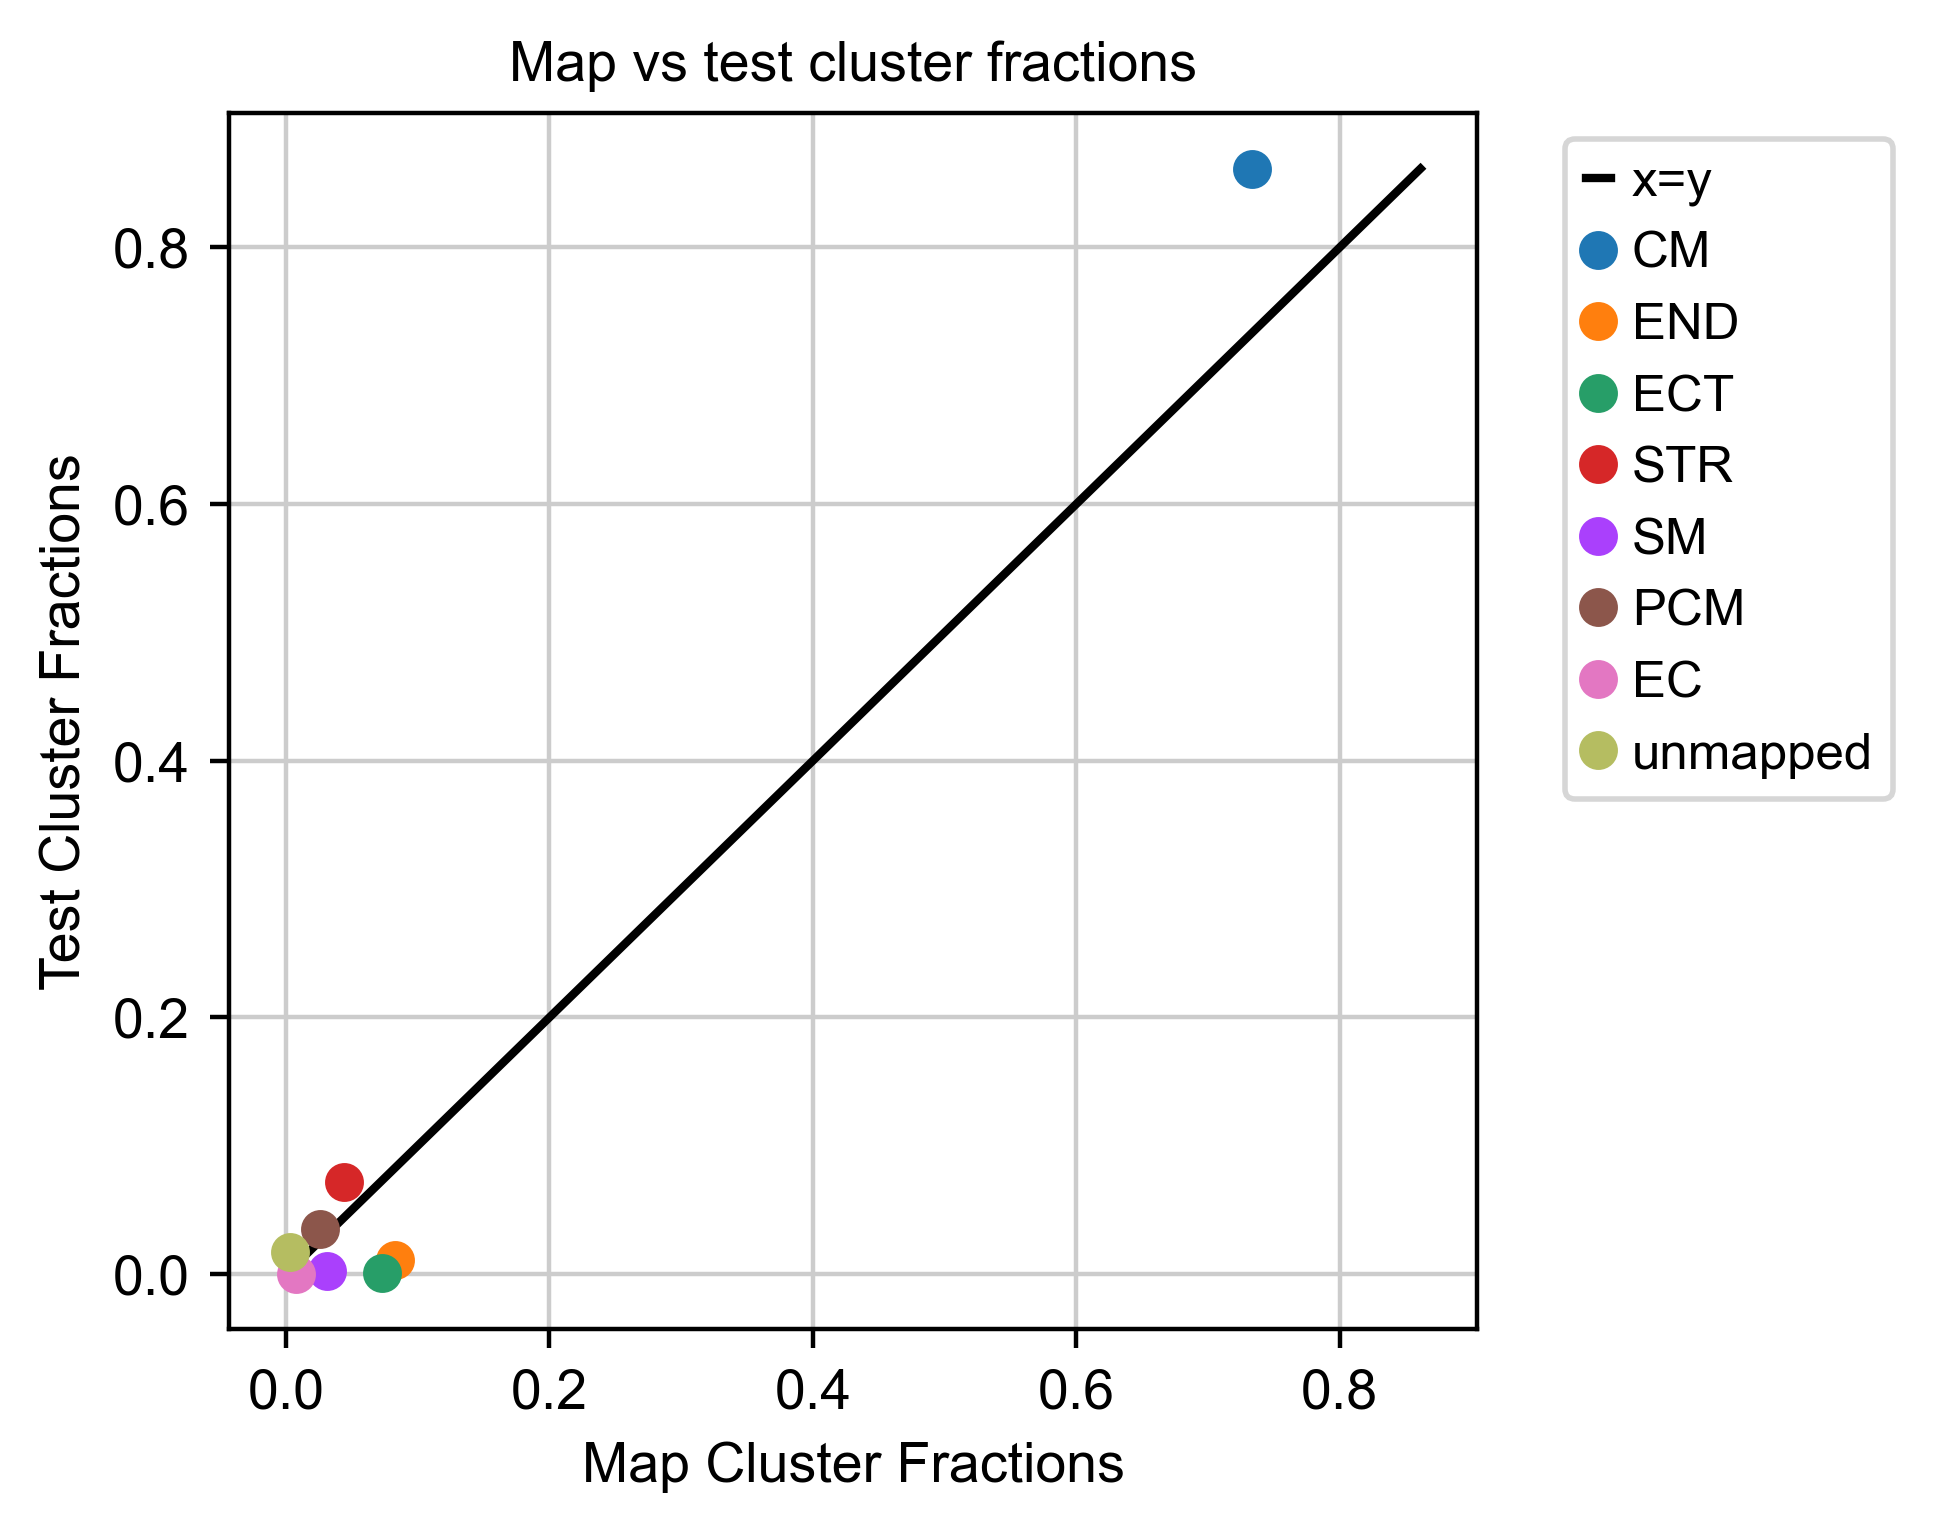

Done generating plots!
Writing logs...Done!
scCompare Complete!


In [3]:
adata_test_annotated = scc.sc_compare(
    adata_test=test_adata,
    adata_map=map_adata,
    map_cluster_key="cell_type",  # The field in `obs` by which to categorize cells
    test_cluster_key="cell_type",  # The name of the new field in `obs` to be created
    outdir=OUT_DIR,  # Where to store output
)


### Interpreting the plots

Let's review the plotted output. The following descriptions correspond to the above
plots, in order:

* An elbow plot used to determine the MAD cutoff to use a statistical threshold for
  assigning a grouping to a given cell. The red line indicates the threshold chosen.
* A clustered heatmap of the pearson correlation coefficient of the bulk signatures in
  each grouping.
* UMAP representations of the mapping dataset colored (from left to right) by manually
  annotated grouping, the scCompare-assigned annotation (before applying threshold), and
  the pearson correlation of each cell to the bulk signature of its grouping.
* A heatmap of average expression of each gene for each grouping. This is a
  representation of the bulk signatures used for assigning groupings.
* A violin plot showing the distribution of pearson correlation values for each cell to
  its assigned cell type (from the mapping dataset). 
* UMAP representations of the mapping dataset colored (from left to right) by manually
  annotated grouping and the assigned grouping using the statistical threshold.
* UMAP representations of the test dataset colored (from left to right) by the assigned
  annotation (before applying threshold) and the final assigned grouping using the
  statistical threshold.
* A violin plot showing the distribution of pearson correlation values for each cell to
  its assigned grouping. The mapping and test datasets are shown side by side.
* A scatterplot showing the relationship between the proportion of cells assigned to
  each grouping in the test vs mapping dataset.

All of these should also appear in the output directory you specified in the method
call. To not display the plots, you can pass the `show_plots = False` parameter. To not
make the plots altogether, you can pass the `make_plots = False` parameter.

### Navigating the output object

The output is an annotated adata object. Let's look at its `obs`:

In [4]:
adata_test_annotated.obs


day protocol cell_line  passage scientist  \
Unnamed: 0                                                             
E1_ACCACTGTGAATCTGA_19_6   D14        C    AICS37       35        AN   
E1_GATAGACAAGTACAAG_7_3    D14        C    AICS11       42        CD   
E1_CCGTGAGAAGTCACTA_9_3    D14        C    AICS37       35        AN   
E1_AAGACGGAAGAGTCAA_5_1    D14        C     AICS0       32        AN   
E1_AACTCACCCAGCGTTA_33_5   D26        C    AICS11       44        KG   
...                        ...      ...       ...      ...       ...   
E1_TCTTCACAGCGAGTAA_9_9    D14        C    AICS37       35        AN   
E1_AGTGGTCAAGCCATGC_19_8   D14        C    AICS37       35        AN   
E1_AAGGTACAAGATCGCA_17_10  D14        C    AICS11       44        AN   
E1_TAGGATGAAACGTGAT_3_11   D14        C    AICS37       34        AN   
E1_CTGAGCCACTGGCATA_40_12  D26        C     AICS0       28        AN   

                            diff_exp ctnt seq_exp  sample_num  n_genes  ...  \
Unnamed: 0                                                              ...   
E1_ACCACTGTGAATCTGA_19_6   7_24_2017   92    Exp1          20     5031  ...   
E1_GATAGACAAGTACAAG_7_3    7_13_2017   94    Exp1           8     5302  ...   
E1_CCGTGAGAAGTCACTA_9_3    7_13_2017   96    Exp1          10     5211  ...   
E1_AAGACGGAAGAGTCAA_5_1    7_13_2017   75    Exp1           6     5490  ...   
E1_AACTCACCCAGCGTTA_33_5   7_24_2017   89    Exp1          34     4490  ...   
...                              ...  ...     ...         ...      ...  ...   
E1_TCTTCACAGCGAGTAA_9_9    7_13_2017   96    Exp1          10     1121  ...   
E1_AGTGGTCAAGCCATGC_19_8   7_24_2017   92    Exp1          20     1132  ...   
E1_AAGGTACAAGATCGCA_17_10  7_24_2017   88    Exp1          18     1164  ...   
E1_TAGGATGAAACGTGAT_3_11   7_10_2017   96    Exp1           4     1086  ...   
E1_CTGAGCCACTGGCATA_40_12  7_27_2017   75    Exp1          41     1288  ...   

                           total_counts  doublet_score  predicted_doublet  \
Unnamed: 0                                                                  
E1_ACCACTGTGAATCTGA_19_6        15810.0       0.103567              False   
E1_GATAGACAAGTACAAG_7_3         15807.0       0.040404              False   
E1_CCGTGAGAAGTCACTA_9_3         15795.0       0.053718              False   
E1_AAGACGGAAGAGTCAA_5_1         15794.0       0.019455              False   
E1_AACTCACCCAGCGTTA_33_5        15744.0       0.059406              False   
...                                 ...            ...                ...   
E1_TCTTCACAGCGAGTAA_9_9          1878.0       0.030859              False   
E1_AGTGGTCAAGCCATGC_19_8         1876.0       0.063221              False   
E1_AAGGTACAAGATCGCA_17_10        1873.0       0.265464              False   
E1_TAGGATGAAACGTGAT_3_11         1872.0       0.034954              False   
E1_CTGAGCCACTGGCATA_40_12        1872.0       0.019106              False   

                            S_score  G2M_score  phase  \
Unnamed: 0                                              
E1_ACCACTGTGAATCTGA_19_6  -0.727192  -0.479931     G1   
E1_GATAGACAAGTACAAG_7_3   -0.709613  -0.736535     G1   
E1_CCGTGAGAAGTCACTA_9_3   -0.574099  -0.501397     G1   
E1_AAGACGGAAGAGTCAA_5_1   -0.616600  -0.522715     G1   
E1_AACTCACCCAGCGTTA_33_5  -0.744993  -0.450968     G1   
...                             ...        ...    ...   
E1_TCTTCACAGCGAGTAA_9_9   -0.091121  -0.027199     G1   
E1_AGTGGTCAAGCCATGC_19_8  -0.107032  -0.040872     G1   
E1_AAGGTACAAGATCGCA_17_10 -0.055630  -0.082431     G1   
E1_TAGGATGAAACGTGAT_3_11  -0.107032  -0.068072     G1   
E1_CTGAGCCACTGGCATA_40_12 -0.095349  -0.023230     G1   

                           control_vs_experimental ass_cluster ass_pearson  \
Unnamed: 0                                                                   
E1_ACCACTGTGAATCTGA_19_6                   testing          CM    0.698539   
E1_GATAGACAAGTACAAG_7_3                    testing          CM    0.575451   
E1_CCG

You'll notice 3 new columns appear at the end:

* `ass_cluster` is the grouping with which the cell had the highest correlation
* `ass_pearson` is the correlation value of the cell to the `ass_cluster` group
* `canon_label_ass` is the final grouping assignment. It can be `unmapped` if the
  `ass_pearson` is too low.

There is further scCompare output stored in the unstructured data under the `scCompare`
key:

In [5]:
list(adata_test_annotated.uns["scCompare"].keys())


['call_local_variables',
 'bulk_sig',
 'stat_cutoff_knee_value',
 'stat_group_cutoff',
 'adata_map_fraction_misclassified_cells',
 'adata_map_fraction_unmapped_cells',
 'marker_genes_per_cluster_df',
 'bin_genes_df_map',
 'colordict',
 'assigned_cluster_frequencies',
 'fraction_mapped_cells',
 'fraction_mapped_calls',
 'r2_score',
 'adata_test_gene_presence_in_cluster',
 'assigned_cluster_fractions',
 'simple_match_similarity',
 'combined_cluster_metrics',
 'df_frac_mapped_compare',
 'silhouette_score_comparison',
 'adata_map']

A particularly useful output is the `combined_cluster_metrics`. This dataframe shows
what proportion of cells are assigned to each grouping for the mapping and test datasets
side by side. It also shows the Simple Match Similarity (SMS). This metric shows the
proportion overlap between marker genes in the cells assigned to the grouping in the
mapping and testing clusters. Note the SMS may not be meaningful if a very small
number of cells are assigned to a given grouping in either dataset.

In [6]:
adata_test_annotated.uns["scCompare"]["combined_cluster_metrics"]


Mapping Cluster Fractions  Testing Cluster Fractions  \
CM                         0.733173                   0.861326   
END                        0.083104                   0.010774   
ECT                        0.073031                   0.001141   
STR                        0.043727                   0.072126   
SM                         0.030792                   0.002282   
PCM                        0.025870                   0.034859   
EC                         0.007326                   0.000254   
unmapped                   0.002976                   0.017239   

          Simple Match Similarity  
CM                       0.959860  
END                      0.886907  
ECT                      0.584900  
STR                      0.975948  
SM                       0.863332  
PCM                      0.989328  
EC                       0.668047  
unmapped                 0.987416

You can also recover the annotated mapping adata object. The `obs` contains the same
added fields as those described above in the annotated test adata object.

In [7]:
adata_map_annotated = adata_test_annotated.uns["scCompare"]["adata_map"]
adata_map_annotated.obs


day protocol cell_line  passage scientist  \
Unnamed: 0                                                            
E1_TGAAGAGAAGAGTCAA_32_8  D24       SM    AICS11       44        KG   
E1_ATCATTCCAACAACCA_0_7   D12       SM     AICS0       31        AN   
E1_CCTAATCCCATACCAA_0_1   D12       SM     AICS0       31        AN   
E1_AAGACGGAAAGGACAC_20_6  D12       SM     AICS0       28        KG   
E1_ACACGACCAAGGTACA_6_8   D12       SM    AICS11       42        KG   
...                       ...      ...       ...      ...       ...   
E2_CGGATTGCATAGCGAC_46_2  D24       SM    AICS37       37        KG   
E2_CGGATTGCTGGAACAA_46_2  D24       SM    AICS37       37        KG   
E2_GAGTTAGCAACCGAGA_45_1  D24       SM    AICS37       37        KG   
E2_AAGACGGAAAGGTACA_46_2  D24       SM    AICS37       37        KG   
E2_AGCAGGAAAACCGAGA_45_3  D24       SM    AICS37       37        KG   

                           diff_exp ctnt seq_exp  sample_num  n_genes  ...  \
Unnamed: 0                                                             ...   
E1_TGAAGAGAAGAGTCAA_32_8  7_24_2017   92    Exp1          33     4941  ...   
E1_ATCATTCCAACAACCA_0_7   7_10_2017   73    Exp1           1     5270  ...   
E1_CCTAATCCCATACCAA_0_1   7_10_2017   73    Exp1           1     4930  ...   
E1_AAGACGGAAAGGACAC_20_6  7_27_2017   77    Exp1          21     4389  ...   
E1_ACACGACCAAGGTACA_6_8   7_13_2017   86    Exp1           7     5471  ...   
...                             ...  ...     ...         ...      ...  ...   
E2_CGGATTGCATAGCGAC_46_2  7_27_2017   84    Exp2          45     1373  ...   
E2_CGGATTGCTGGAACAA_46_2  7_27_2017   84    Exp2          45     1389  ...   
E2_GAGTTAGCAACCGAGA_45_1  7_27_2017   84    Exp2          45     1285  ...   
E2_AAGACGGAAAGGTACA_46_2  7_27_2017   84    Exp2          45     1444  ...   
E2_AGCAGGAAAACCGAGA_45_3  7_27_2017   84    Exp2          45     1474  ...   

                          predicted_doublet   S_score  G2M_score  phase  \
Unnamed: 0                                                                
E1_TGAAGAGAAGAGTCAA_32_8              False -0.483422  -0.577555     G1   
E1_ATCATTCCAACAACCA_0_7               False  0.715843   0.516099      S   
E1_CCTAATCCCATACCAA_0_1               False -0.902425  -0.206763     G1   
E1_AAGACGGAAAGGACAC_20_6              False -0.632844  -0.474345     G1   
E1_ACACGACCAAGGTACA_6_8               False -0.622719  -0.747758     G1   
...                                     ...       ...        ...    ...   
E2_CGGATTGCATAGCGAC_46_2              False -0.144860  -0.077236     G1   
E2_CGGATTGCTGGAACAA_46_2              False -0.050512  -0.068072     G1   
E2_GAGTTAGCAACCGAGA_45_1              False -0.102804  -0.019946     G1   
E2_AAGACGGAAAGGTACA_46_2              False -0.104250  -0.092820     G1   
E2_AGCAGGAAAACCGAGA_45_3              False -0.064530   0.017104    G2M   

                          control_vs_experimental  leiden  cell_type  \
Unnamed: 0                                                             
E1_TGAAGAGAAGAGTCAA_32_8                  control       1         CM   
E1_ATCATTCCAACAACCA_0_7                   control      12        PCM   
E1_CCTAATCCCATACCAA_0_1                   control       8         CM   
E1_AAGACGGAAAGGACAC_20_6                  control       3         CM   
E1_ACACGACCAAGGTACA_6_8                   control      13         EC   
...                                           ...     ...        ...   
E2_CGGATTGCATAGCGAC_46_2                  control       6         CM   
E2_CGGATTGCTGGAACAA_46_2                  control       6         CM   
E2_GAGTTAGCAACCGAGA_45_1                  control       6         CM   
E2_AAGACGGAAAGGTACA_46_2                  control       0         CM   
E2_AGCAGGAAAACCGAGA_45_3                  control      11         SM   

                         ass_cluster ass_pearson canon_label_ass  
Unnamed: 0                                                        
E1_TGAAGAGAAGAGTCAA_32_8          CM    

## Producing custom plots

Although the `sc_compare` method provides a wrapper around the full pipeline, plots can
be produced individually and customized using the `plots` module.

The scatterplot produced in the initial run looks crowded. Below, we tweak the 
parameters to plot it in log scale and get a clearer visualization. Plotting functions
also return the plot objects they produce, typically the `Axes` objects produced by
`matplotlib`.

/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/home/tgelafromer/mambaforge/envs/sc-compare/lib/python3.10/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/tmp/ipykernel_2762/4037980777.py:10: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.get_figure().show()


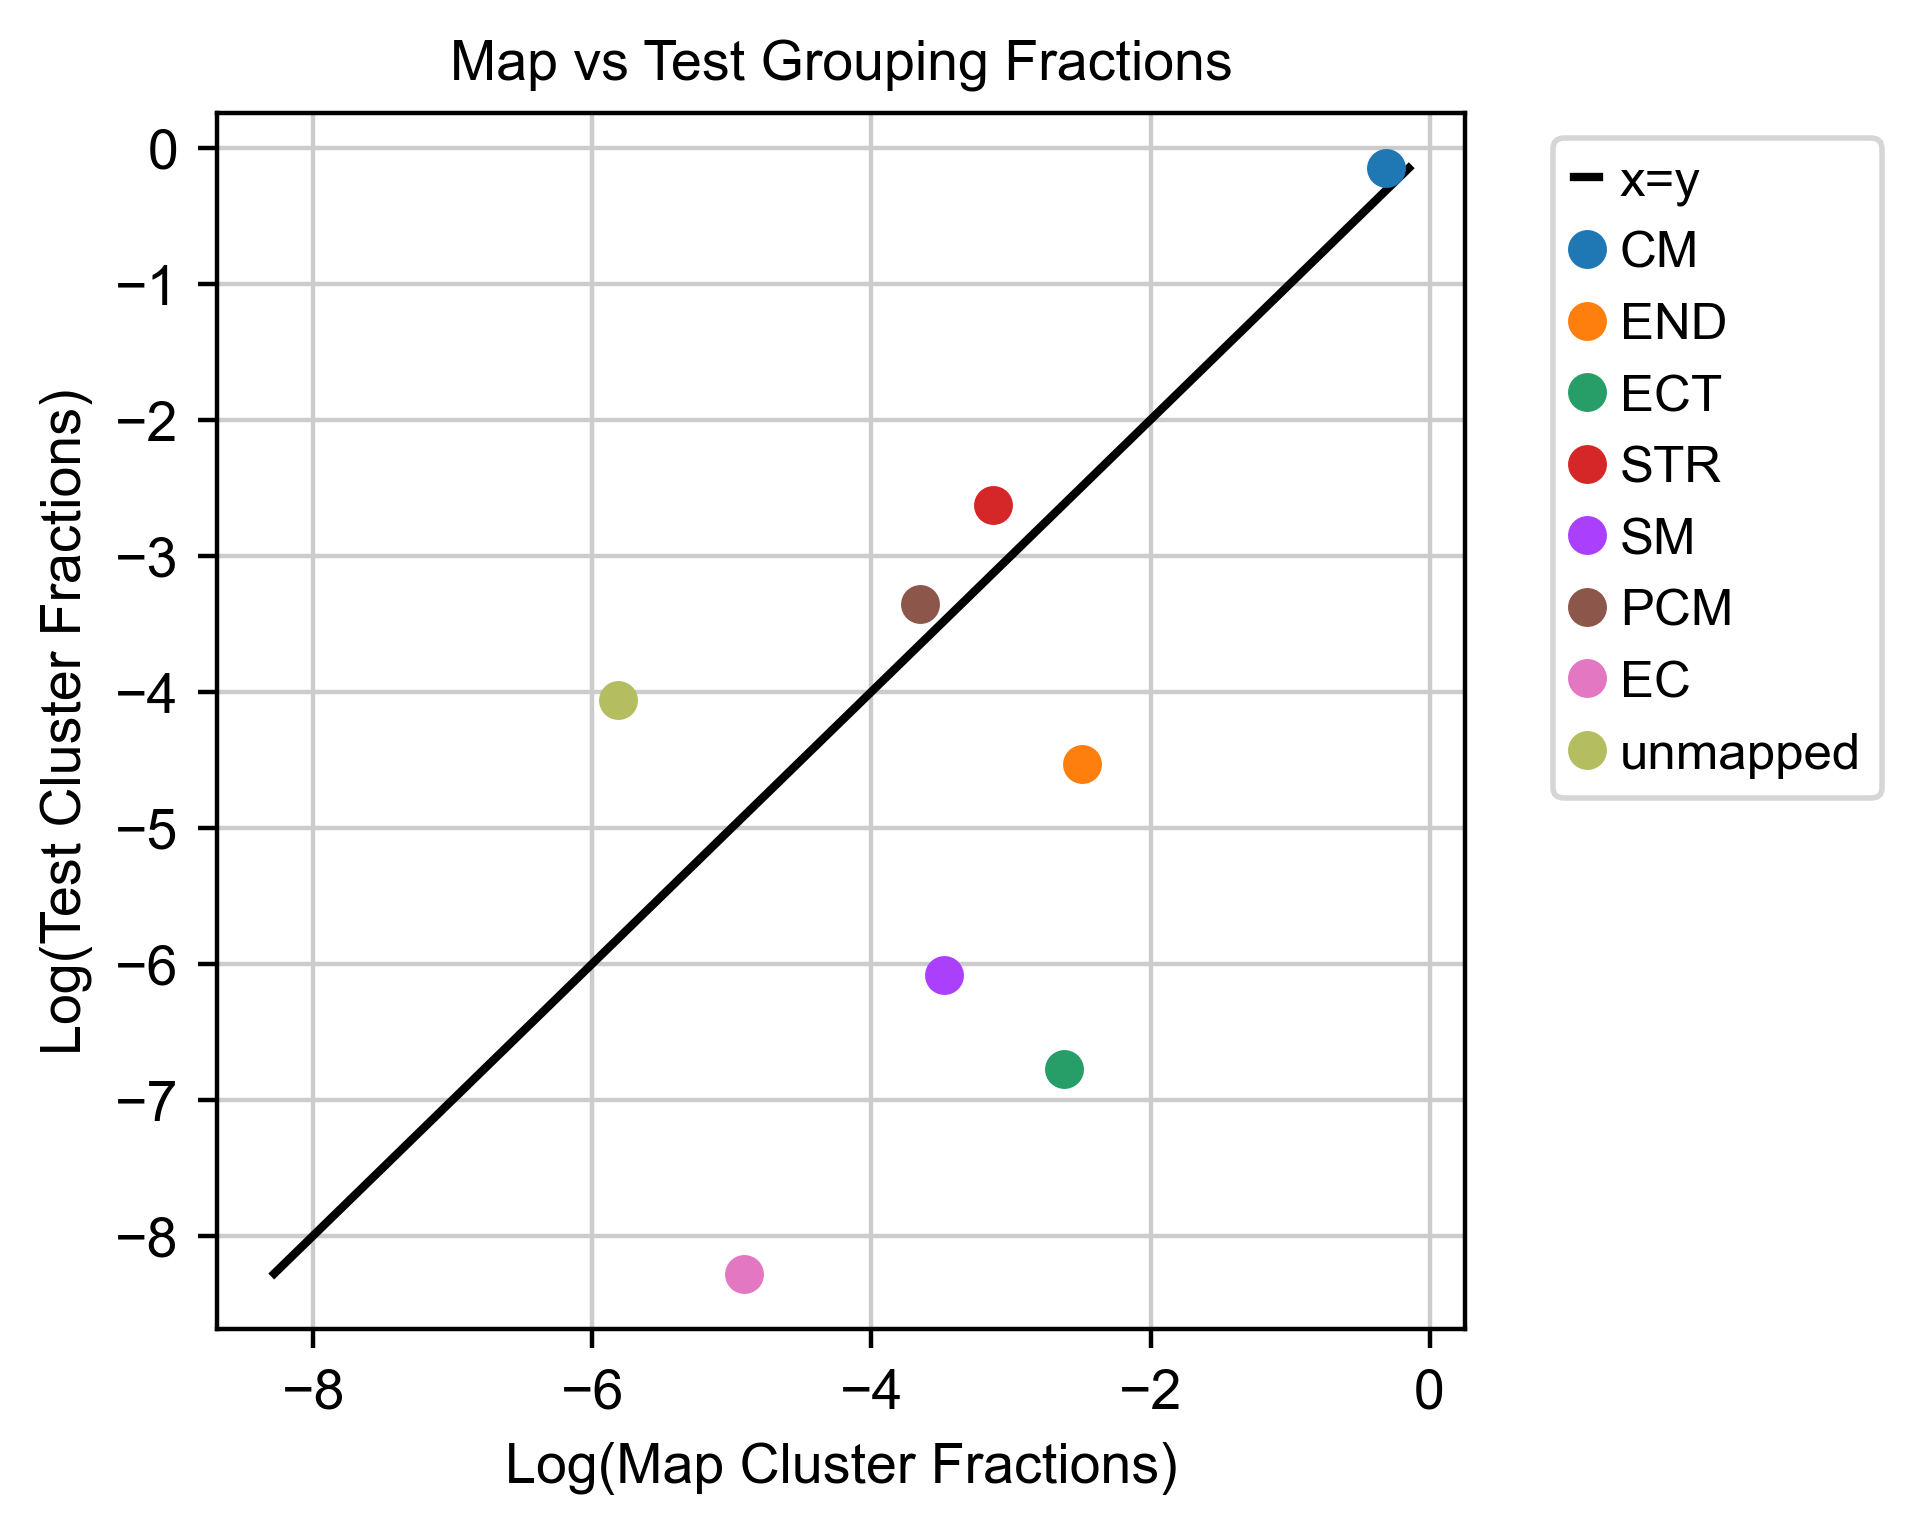

In [8]:
import plots

ax = plots.plot_map_vs_test_cluster_fractions(
    adata_test=adata_test_annotated,
    adata_map=adata_map_annotated,
    title = "Map vs Test Grouping Fractions",
    log=True,  # Plot both the x and y axis on a log scale
    show=False,  # Don't show the plot in the function, we want to show it here instead
)
ax.get_figure().show()


`scCompare` also exposes some useful functions in the `helpers` module. To reproduce
figure 3c from the text, we want to produce a correlation heatmap for bulk signatures
within leiden clusters rather than cell types. We can calculate the desired bulk
signature on the fly using the `helpers` module and produce the corresponding plot using
the `plots` module. Below, we also pass additional `kwargs` to the plotting function to
get the visual output we need. Aesthetics that cannot be modified via parameters are 
modified via object manipulation.

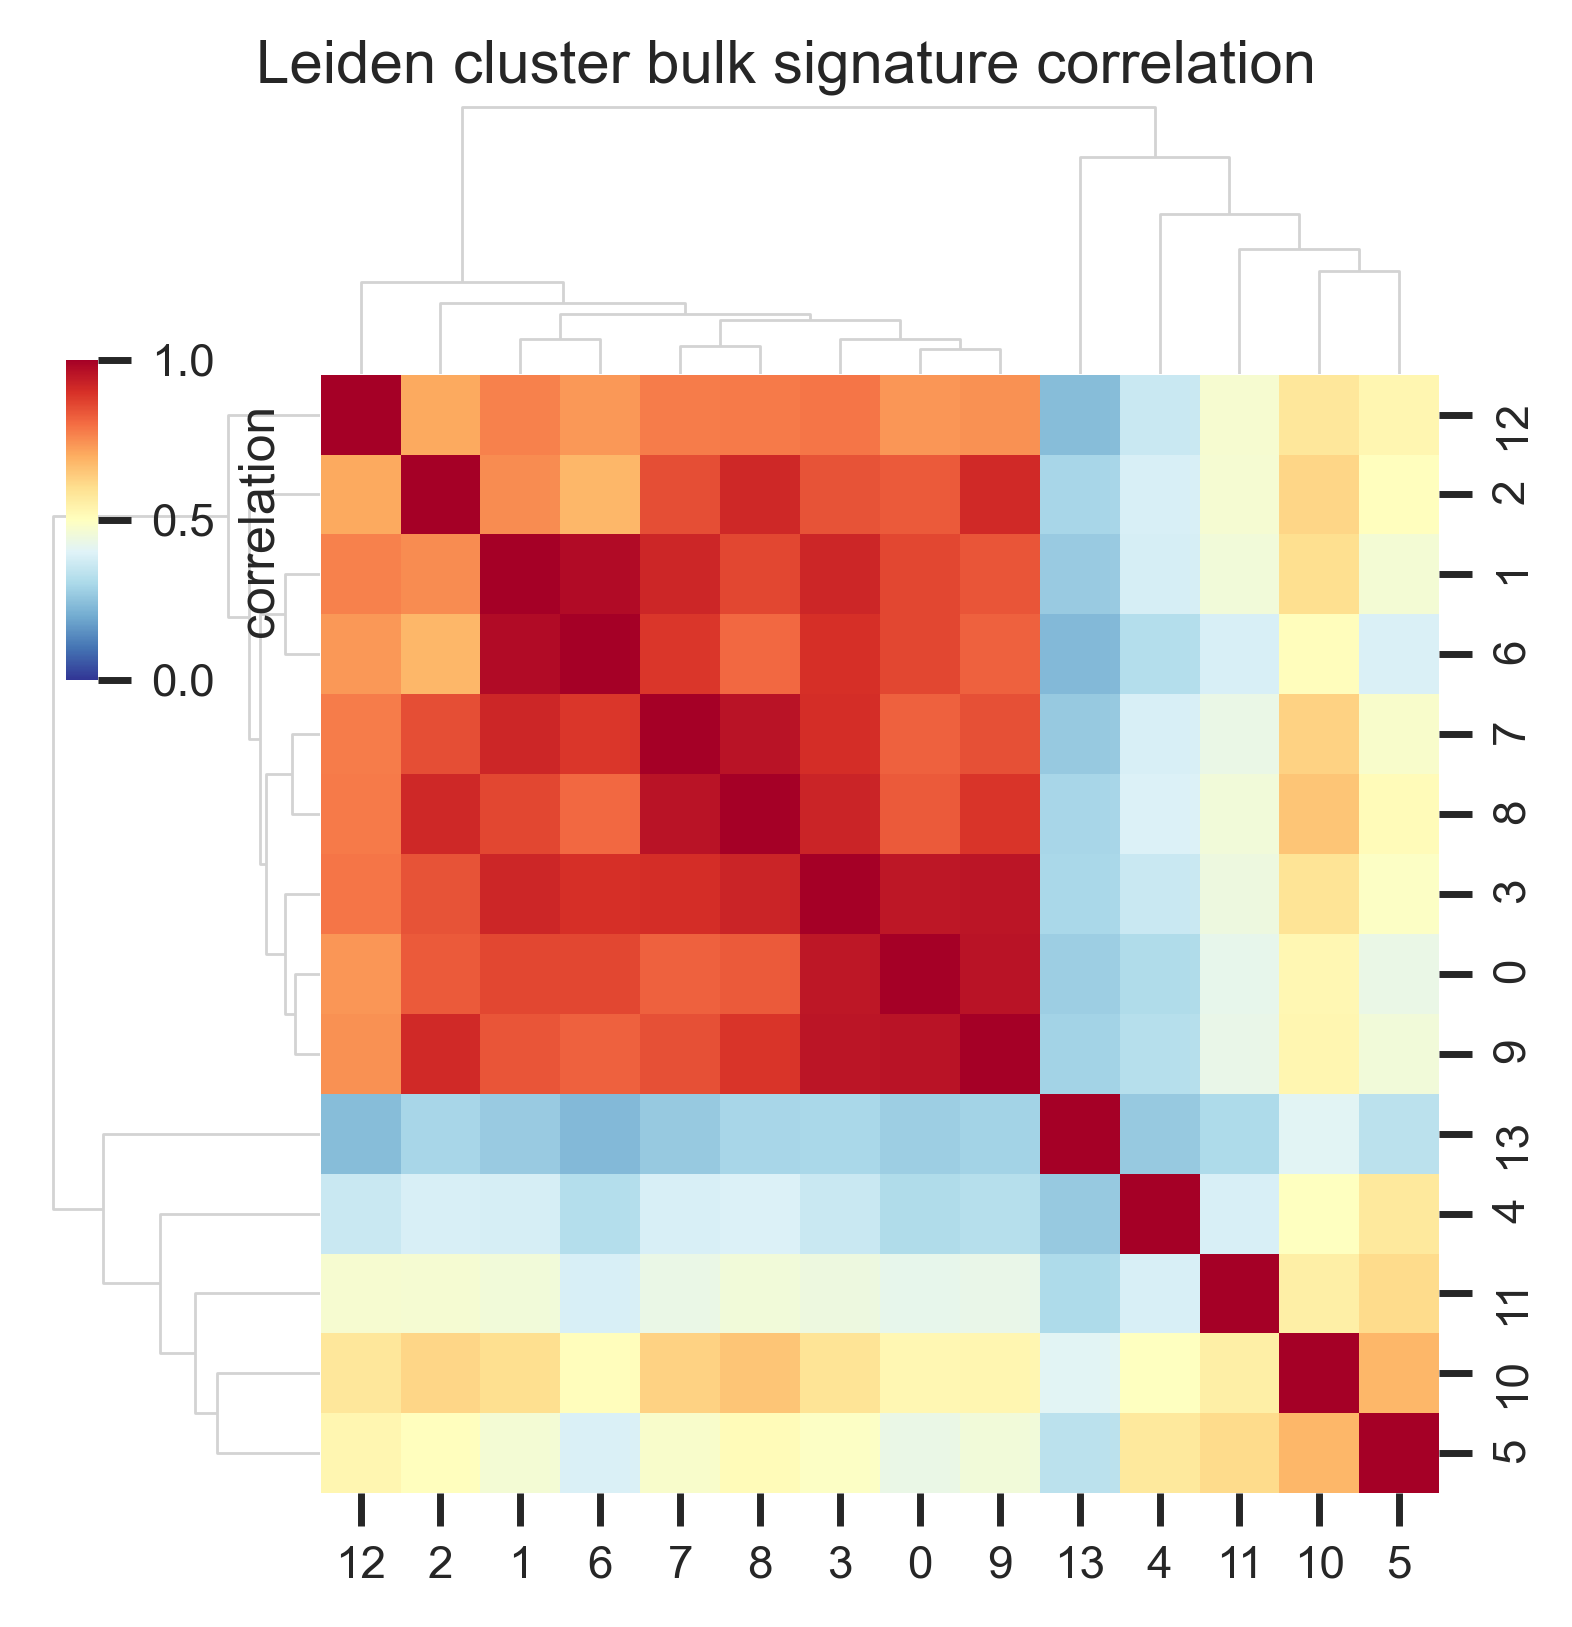

In [9]:
import seaborn as sns
import helpers

leiden_bulk_sig = helpers.generate_bulk_sig(
    map_adata,
    cluster_key="leiden",
)

sns.set(font_scale=0.75)
g = plots.plot_mapping_correlation(
    bulk_sig=leiden_bulk_sig,
    title="Leiden cluster bulk signature correlation",
    tree_kws={"colors": "lightgrey"},
    cbar_kws={"label": "correlation"},
    cbar_pos=(0.05, 0.6, 0.02, 0.2),
    show=False,
    figsize=(4, 4)
)
g.ax_heatmap.tick_params(axis="x", reset=True, top=False)
g.ax_heatmap.grid(False)
g.ax_cbar.grid(False)
